#INTRODUCCIÓN



La satisfacción de los estudiantes es fundamental para el éxito de cualquier universidad. Una universidad local busca entender qué tan probable es que sus alumnos recomienden la institución a amigos y conocidos. Para ello, realizó una encuesta preguntando: **"¿Recomendarías la universidad a tus amigos/conocidos?**", con respuestas en una escala de 0 a 10, donde 0 significa "nunca recomendaría" y 10 significa "sí, recomendaría".

Las respuestas se categorizaron de la siguiente manera:

[0-3] = No recomendaría (1)

[4-5] = Es poco probable que recomiende (2)

[6-8] = Muy probable que recomiende (3)

[9-10] = Sí recomendaría (4)

El objetivo es predecir la probabilidad de recomendación utilizando técnicas de machine learning. Esto permitirá a la universidad identificar factores clave que influyen en la satisfacción estudiantil y mejorar áreas críticas, aumentando así la probabilidad de recomendación y, en última instancia, su reputación y calidad educativa.

INSTALAR E IMPORTAR LIBRERÍAS

In [ ]:
!pip install stop-words rippletagger spellchecker textblob nltk xgboost lightgbm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 19.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=59e0378fa830e0f387b3bdce524fe414e3b99ab5b9016eadb07b09cb973363b0
  Stored in directory: /root/.cache/pip/wheels/98/8d/87/5894deb0270ab49fc65555daa606a7d1dfa144f456bb9e0795
  Created wheel for rippletagger: filename=rippletagger-0.2-py3-none-any.whl size=5871708 sha256=24c3ba2790450a25c4e067ce52660c82914684cb13694ebd3f5f7e886291f4a8
  Stored in directory: /root/.cache/pip/wheels/56/b5/3b/4b4788e5b295634f8ef0a9c0251f7fb97e7e0e5615b087a1c7
  Created wheel for spellchecker: filename=spellchecker-0.

In [ ]:
!pip install stop_words

In [ ]:
!pip install rippletagger

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 50.9 MB/s eta 0:00:00


In [ ]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

# Manipulación de textos
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import snowballstemmer
from stop_words import get_stop_words # Identificación de palabras inútiles
from rippletagger.tagger import Tagger # Etiquetado de los tokens, es decir POS
#from spellchecker import SpellChecker # Corrección ortográfica
from textblob import TextBlob, Word # Análisis de sentimientos y detección de emociones
import nltk
nltk.download(['wordnet', 'stopwords']) # Descarga del recurso wordnet

# Procesamiento y evaluación
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, classification_report, accuracy_score

# Modelado
import lightgbm as lgb
from xgboost import XGBClassifier

# Visualización y personalización en Google Colab
from IPython.display import display, HTML

# Descargar el recurso wordnet para nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

IMPORTAR DATA

In [ ]:
train = pd.read_csv('/content/train_universidad.csv', sep=',', encoding='latin1')

In [ ]:
test = pd.read_csv('/content/test_universidad.csv', sep=',', encoding='latin1')

#EDA Y PRE PROSESAMIENTO

In [ ]:
train.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,NPS
0,13501,1,AC,3,2,Me gusta la u es paja bro y soy pito,NaN,Delegado,6.0,NaN,3
1,23622,3,AC,25,1,El metodo de blended no le hace bien a todos,NaN,Delegado,5.0,NaN,3
2,8354,4,AC,31,1,"Los profesores, sus m_todos de enseÐanza bes ...",NaN,NaN,5.0,NaN,4
3,17745,4,AC,28,6,Porque posee gran mayorÕa de profesores espec...,GEA,NaN,6.0,NaN,3
4,10867,3,AC,34,1,La pencion,NaN,NaN,6.0,NaN,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_ENCUESTADO                  20000 non-null  int64  
 1   Nombre Campus                   20000 non-null  int64  
 2   NIVEL ACTUAL                    20000 non-null  object 
 3   Clave de carrera                20000 non-null  int64  
 4   Ciclo                           20000 non-null  int64  
 5   COMENTARIO                      20000 non-null  object 
 6   IND_GEA                         299 non-null    object 
 7   IND_DELEGADO                    3532 non-null   object 
 8   CANT_CURSOS_MATRICU_SIN_INGLES  19634 non-null  float64
 9   UOD_depostista_ind_deportista   148 non-null    object 
 10  NPS                             20000 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 1.7+ MB


IND_GEA, IND_DELEGADO, UOD_deportista_ind_deportista

In [ ]:
train['IND_GEA'].unique()

NameError: name 'train' is not defined

In [ ]:
train['IND_DELEGADO'].unique()

array(['Delegado', nan], dtype=object)

In [ ]:
train['UOD_depostista_ind_deportista'].unique()

array([nan, 'Deportista'], dtype=object)

Vemos que estas variables tienen nan y la misma variable, por conocimiento del negocio sabemos que son binarias

Hacemos el cambio para el train y test

In [ ]:
for x in ["IND_GEA","IND_DELEGADO","UOD_depostista_ind_deportista"]:
#Cambiamos los nulos por 0s
    train.loc[train[x].isnull(),x]=0
    test.loc[test[x].isnull(),x]=0
#Cambiamos los nonulos por 1
    train.loc[train[x]!=0,x]=1
    test.loc[test[x]!=0,x]=1

In [ ]:
#Ahora que son bolleanos las pasaremos a int
#PARA EL TRAIN
train['IND_GEA']=train['IND_GEA'].astype('int')
train['IND_DELEGADO']=train['IND_DELEGADO'].astype('int')
train['UOD_depostista_ind_deportista']=train['IND_GEA'].astype('int')

#PARA EL TEST
test['IND_GEA'] = test['IND_GEA'].astype('int')
test['IND_DELEGADO'] = test['IND_DELEGADO'].astype('int')
test['UOD_depostista_ind_deportista'] = test['UOD_depostista_ind_deportista'].astype('int')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   COD_ENCUESTADO                  20000 non-null  int64  
 1   Nombre Campus                   20000 non-null  int64  
 2   NIVEL ACTUAL                    20000 non-null  object 
 3   Clave de carrera                20000 non-null  int64  
 4   Ciclo                           20000 non-null  int64  
 5   COMENTARIO                      20000 non-null  object 
 6   IND_GEA                         20000 non-null  int64  
 7   IND_DELEGADO                    20000 non-null  int64  
 8   CANT_CURSOS_MATRICU_SIN_INGLES  19634 non-null  float64
 9   UOD_depostista_ind_deportista   20000 non-null  int64  
 10  NPS                             20000 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 1.7+ MB


In [ ]:
train['IND_DELEGADO'].unique()

array([1, 0])

In [ ]:
train['IND_GEA'].unique()

array([0, 1])

In [ ]:
train['UOD_depostista_ind_deportista'].unique()

array([0, 1])

NIVEL ACTUAL

In [ ]:
train['NIVEL ACTUAL'].unique()

array(['AC', 'FC', 'PRESENCIAL', 'ON LINE'], dtype=object)

In [ ]:
train.groupby('NIVEL ACTUAL').size()

NIVEL ACTUAL
AC            14990
FC             4645
ON LINE          12
PRESENCIAL      353
dtype: int64

Los volveremos numéricos asginando valores

ON LINE: 0

PRESENCIAL:1

FC:2

AC:3

In [ ]:
#PARA EL TRAIN
train['NIVEL ACTUAL'] = train['NIVEL ACTUAL'].map({'ON LINE' : 0, 'PRESENCIAL' : 1,'FC' : 2,'AC' : 3}).astype(int)
#PARA EL TEST
test['NIVEL ACTUAL'] = test['NIVEL ACTUAL'].map({'ON LINE' : 0, 'PRESENCIAL' : 1,'FC' : 2,'AC' : 3}).astype(int)

CANT_CURSOS_MATRICU_SIN_INGLES

In [ ]:
unicos=train['CANT_CURSOS_MATRICU_SIN_INGLES'].unique()
print(unicos)

[ 6.  5.  4.  7.  2.  8.  3.  1. nan  0.  9. 10.]


In [ ]:
train['CANT_CURSOS_MATRICU_SIN_INGLES'].unique()

array([ 6.,  5.,  4.,  7.,  2.,  8.,  3.,  1., nan,  0.,  9., 10.])

Entendemos que los nan también son 0s así que

In [ ]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

In [ ]:
test.isnull().sum()

COD_ENCUESTADO                    0
Nombre Campus                     0
NIVEL ACTUAL                      0
Clave de carrera                  0
Ciclo                             0
COMENTARIO                        0
IND_GEA                           0
IND_DELEGADO                      0
CANT_CURSOS_MATRICU_SIN_INGLES    0
UOD_depostista_ind_deportista     0
dtype: int64

Aplicamos las funciones definidas a los comentarios para train y test

##NLP DEL COMENTARIO

In [ ]:
#n_palabras: El número de palabras en el comentario limpio.
#n_letras: El número de letras en el comentario limpio.
#letras/palabras: La relación de letras a palabras en el comentario limpio.
#n_mayusculas: El número de letras mayúsculas en el comentario limpio.
#mayusculas/letras: La relación de letras mayúsculas a letras totales en el comentario limpio.
#n_puntuacion: El número de caracteres de puntuación en el comentario original.

In [ ]:
def count_tags(sentence,kind):
    l=[x[1] for x in tagger.tag(sentence)]
    return l.count(kind)

def remove_stop(sentence):
    list=sentence.split()
    no_cons=get_stop_words('spanish')
    list2=[x for x in list if x.lower() not in no_cons]
    return " ".join(list2)

In [ ]:
for df in [train, test]:
    df["comentario_limpio"] = df['COMENTARIO'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))  # Eliminar la puntuación de los comentarios
    df['comentario_limpio'] = df['comentario_limpio'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')  # Normalizar el texto a NFKD, convertir a ASCII y eliminar caracteres no ASCII
    df["comentario_limpio_sin"] = df["comentario_limpio"].apply(lambda x: remove_stop(x))  # Eliminar las palabras de parada (stop words)
    df["comentario_limpio_sin"] = df['comentario_limpio_sin'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))  # Convertir todas las palabras a minúsculas

    # Creación de nuevas características basadas en los comentarios procesados
    df["n_palabras"] = df["comentario_limpio"].apply(lambda x: len(x.split()))  # Contar el número de palabras en el comentario limpio
    df["n_letras"] = df["comentario_limpio"].apply(lambda x: sum(c != ' ' for c in x))  # Contar el número de letras en el comentario limpio
    df["letras/palabras"] = df["n_letras"] * 1.0 / df["n_palabras"]  # Calcular la relación de letras a palabras
    df["n_mayusculas"] = df["comentario_limpio"].apply(lambda x: sum(1 for c in x if c.isupper()))  # Contar el número de letras mayúsculas en el comentario limpio
    df["mayusculas/letras"] = df["n_mayusculas"] * 1.0 / df["n_letras"]  # Calcular la relación de letras mayúsculas a letras totales
    df["n_puntuacion"] = df["COMENTARIO"].apply(lambda x: sum(c != ' ' for c in x)) - df["n_letras"]  # Contar el número de caracteres de puntuación en el comentario original


convertimos los comentarios en una matriz de características TF-IDF.

Vectorización TF-IDF y Reducción de Dimensionalidad con *TruncatedSVD*



Creamos variables a partir de las componentes principales obtenidas mediante
TruncatedSVD aplicado a la matriz TF-IDF de los comentarios limpios en la columna comentario_limpio.
Cada componente principal captura una parte significativa de la información contenida en los datos originales,
y las nuevas variables indican la importancia o la contribución de cada componente para cada comentario.

In [ ]:

gpa = TfidfVectorizer(
    min_df=0.001,
    max_df=0.6,
    analyzer="word",
    token_pattern=r"\w{1,}",
    ngram_range=(1,3),
    use_idf=1,
    smooth_idf=1,
    sublinear_tf=1
)

# Ajustar el vectorizador con los datos de entrenamiento
gpa.fit(train["comentario_limpio"])

# Transformar los datos de entrenamiento y prueba
gpa_train_trans = gpa.transform(train["comentario_limpio"])
gpa_test_trans = gpa.transform(test["comentario_limpio"])

# Crear el modelo TruncatedSVD para reducir la dimensionalidad a 20 componentes
pca = TruncatedSVD(n_components=20)

# Ajustar el modelo con los datos de entrenamiento transformados (TF-IDF)
pca.fit(gpa_train_trans.toarray())

# Transformar los datos de entrenamiento y prueba
general_train = pca.transform(gpa_train_trans.toarray())
general_test = pca.transform(gpa_test_trans.toarray())

# Crear DataFrames a partir de las componentes principales

texto_entrenamiento_train = pd.DataFrame(general_train).loc[0:len(train)-1]
texto_entrenamiento_train.columns = [str(x) + "componente" for x in texto_entrenamiento_train.columns]

texto_entrenamiento_test = pd.DataFrame(general_test).loc[0:len(test)-1]
texto_entrenamiento_test.columns = [str(x) + "componente" for x in texto_entrenamiento_test.columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [ ]:
# Agregar nuevas variables a los DataFrames originales

# Para el conjunto de entrenamiento
nombres_train = list(train.columns)
train = pd.concat([train, texto_entrenamiento_train], axis=1, ignore_index=True)
nombres_train.extend(texto_entrenamiento_train.columns)
train.columns = nombres_train

# Para el conjunto de prueba
nombres_test = list(test.columns)
test = pd.concat([test, texto_entrenamiento_test], axis=1, ignore_index=True)
nombres_test.extend(texto_entrenamiento_test.columns)
test.columns = nombres_test

# Verificar las dimensiones de los DataFrames resultantes
print("Dimensiones del DataFrame de entrenamiento:", train.shape)
print("Dimensiones del DataFrame de prueba:", test.shape)


Dimensiones del DataFrame de entrenamiento: (16000, 39)
Dimensiones del DataFrame de prueba: (4000, 38)


Detección de Errores Ortográficos en Comentarios en Español

Crea la variable Errores_Ortografia a partir de la columna COMENTARIO tanto en el DataFrame train como en el DataFrame test. Esta nueva variable contiene el número de errores ortográficos detectados en cada comentario.



In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

In [ ]:
# Inicializar el corrector ortográfico en español
spell = SpellChecker(language='es')

# Aplicar la detección de errores ortográficos en el conjunto de entrenamiento
train['Errores_Ortografia'] = train['COMENTARIO'].apply(lambda x: len(spell.unknown(x.split())))

# Aplicar la detección de errores ortográficos en el conjunto de prueba
test['Errores_Ortografia'] = test['COMENTARIO'].apply(lambda x: len(spell.unknown(x.split())))


PROPORCION DE STOP WORDS


Creamos una variables que expresa la frecuencia relativa de palabras vacías (stop words) en cada comentario. Esta frecuencia se calcula como el número de stop words dividido entre el número total de palabras en el comentario.

In [ ]:
spanish_stop_words = get_stop_words('spanish')

# Aplicar la detección de stop words en el conjunto de entrenamiento
train['Frecuencia_Stop_Words'] = train['COMENTARIO'].apply(
    lambda x: sum(1 for palabra in x.split() if palabra.lower() in spanish_stop_words) / len(x.split())
)

# Aplicar la detección de stop words en el conjunto de prueba
test['Frecuencia_Stop_Words'] = test['COMENTARIO'].apply(
    lambda x: sum(1 for palabra in x.split() if palabra.lower() in spanish_stop_words) / len(x.split())
)

IDENTIFICAR TEMAS RECURRENTES CON LDA

Creamos estas variables (Tema_0, Tema_1, Tema_2, Tema_3) que representn la proporción de pertenencia de cada comentario a uno de los 4 temas identificados por el modelo de LDA (Latent Dirichlet Allocation).

Los valores en estas variables son probabilidades que indican la fuerza con la que un comentario se asocia a cada uno de los temas.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Inicializar el vectorizador y el modelo LDA
vectorizer = CountVectorizer(max_features=1000, stop_words=spanish_stop_words)
lda = LatentDirichletAllocation(n_components=20, random_state=0)

# Ajustar y transformar los datos de entrenamiento
X_train = vectorizer.fit_transform(train['COMENTARIO'])
lda_train_topics = lda.fit_transform(X_train)

# Ajustar y transformar los datos de prueba
X_test = vectorizer.transform(test['COMENTARIO'])
lda_test_topics = lda.transform(X_test)

# Agregar los temas al conjunto de entrenamiento
for i in range(20):
    train[f'Tema_{i}'] = lda_train_topics[:, i]

# Agregar los temas al conjunto de prueba
for i in range(20):
    test[f'Tema_{i}'] = lda_test_topics[:, i]


In [ ]:
train.shape

(20000, 61)

In [ ]:
test.shape

(8427, 60)

DECTECCION DE LENGUAJE INAPROPIADO


La variable Lenguaje_Inapropiado expresa si un comentario contiene alguna palabra inapropiada de la lista lenguaje_inapropiado.
Los valores son 1 si el comentario contiene alguna palabra inapropiada y 0 si no contiene ninguna.

In [ ]:
lenguaje_inapropiado = [
    'paja', 'pito', 'puta', 'mierda', 'cabron', 'cabrón', 'idiota', 'imbécil', 'imbecil', 'estúpido', 'estupido',
    'maldito', 'maldita', 'coño', 'joder', 'gilipollas', 'pendejo', 'pendeja', 'basura', 'desastre', 'asco',
    'porquería', 'mediocre', 'incompetente', 'patético', 'lamentable', 'malos profesores', 'pésimo servicio',
    'ineptos', 'negligente', 'irresponsable', 'vagos', 'horrible', 'espantoso', 'pésima', 'terrible', 'insufrible',
    'desagradable', 'deficiente', 'decepcionante', 'culero', 'mierdero', 'chinga', 'chingar', 'chingada',
    'chingadera', 'pinche', 'mamadas', 'mamón', 'mamona'
]

def detectar_lenguaje_inapropiado(comentario):
    return 1 if any(palabra in comentario.lower() for palabra in lenguaje_inapropiado) else 0

train['Lenguaje_Inapropiado'] = train['COMENTARIO'].apply(detectar_lenguaje_inapropiado)
test['Lenguaje_Inapropiado'] = test['COMENTARIO'].apply(detectar_lenguaje_inapropiado)



PROPORCION DE SENTIMIENTOS POSITIVOS SOBRE NEGATIVOS

Creamos la variable Proporcion_Sentimiento expresa la proporción de palabras positivas a palabras negativas en cada comentario.

El cálculo se realiza contando el número de palabras positivas y negativas en el comentario y dividiendo el número de palabras positivas entre el número de palabras negativas (más 1 para evitar la división por cero).

Un valor alto indica una mayor proporción de palabras positivas, mientras que un valor bajo indica una mayor proporción de palabras negativas.

In [ ]:
sentimientos_positivos = [
    'bueno', 'excelente', 'positivo', 'agradable', 'feliz', 'contento', 'satisfecho', 'maravilloso',
    'fantástico', 'increíble', 'recomendable', 'impresionante', 'perfecto', 'admirable', 'magnífico',
    'destacado', 'ideal', 'amigable', 'apropiado', 'genial'
]

sentimientos_negativos = [
    'malo', 'problema', 'negativo', 'horrible', 'triste', 'enojado', 'insatisfecho', 'terrible',
    'decepcionado', 'deficiente', 'pésimo', 'inaceptable', 'insuficiente', 'mediocre', 'horrendo',
    'lamentable', 'desastroso', 'infeliz', 'desagradable', 'indignante'
]

# Función para calcular la proporción de sentimientos positivos a negativos
def calcular_proporcion_sentimiento(comentario):
    palabras = comentario.split()
    num_positivas = sum(1 for palabra in palabras if palabra in sentimientos_positivos)
    num_negativas = sum(1 for palabra in palabras if palabra in sentimientos_negativos)
    return num_positivas / (num_negativas + 1)  # Sumar 1 para evitar división por cero

# Aplicar la función al conjunto de entrenamiento
train['Proporcion_Sentimiento'] = train['COMENTARIO'].apply(lambda x: calcular_proporcion_sentimiento(x.lower()))

# Aplicar la función al conjunto de prueba
test['Proporcion_Sentimiento'] = test['COMENTARIO'].apply(lambda x: calcular_proporcion_sentimiento(x.lower()))



In [ ]:
train.shape

(20000, 63)

In [ ]:
test.shape

(8427, 62)

##VARIABLES JENRRY


PALABRAS CLAVE


Cada variable indica si un comentario contiene la palabra clave correspondiente.
Los valores son 1 si el comentario contiene la palabra clave y 0 si no la contiene

In [ ]:
palabras_clave = [
    'recomendaría', 'recomiendo', 'aconsejo', 'sugiero', 'satisfecho', 'contento', 'feliz', 'agradecido', 'encantado',
    'excelente', 'buena', 'alta calidad', 'destacada', 'superior', 'buenos profesores', 'calificados', 'competentes',
    'expertos', 'dedicados', 'seguro', 'amigable', 'positivo', 'acogedor', 'inspirador', 'moderna', 'completa',
    'bien equipada', 'avanzada', 'funcional', 'insatisfecho', 'decepcionado', 'infeliz', 'descontento', 'frustrado',
    'problema', 'dificultad', 'inconveniente', 'deficiencia', 'falla', 'mala calidad', 'deficiente', 'pobre',
    'baja calidad', 'malos profesores', 'descalificados', 'incompetentes', 'poco expertos', 'inseguro', 'hostil',
    'negativo', 'incómodo', 'desalentador', 'obsoleta', 'incompleta', 'mal equipada', 'defectuosa', 'ineficiente'
]

for palabra in palabras_clave:
    train[f'Contiene_{palabra}'] = train['COMENTARIO'].apply(lambda x: 1 if palabra in x.lower() else 0)
    test[f'Contiene_{palabra}'] = test['COMENTARIO'].apply(lambda x: 1 if palabra in x.lower() else 0)

COMPLEJIDAD DE LENGUAJE


La variable Complejidad_Lenguaje expresa el índice de complejidad basado en la longitud promedio de las palabras en cada comentario.
Calcula la longitud promedio de las palabras en el comentario. Un valor más alto indica que, en promedio, las palabras en el comentario son más largas, lo cual puede ser un indicador de un lenguaje más complejo

In [ ]:
import numpy as np
# 2. Índice de complejidad basado en la longitud promedio de las palabras
train['Complejidad_Lenguaje'] = train['COMENTARIO'].apply(lambda x: np.mean([len(palabra) for palabra in x.split()]))
test['Complejidad_Lenguaje'] = test['COMENTARIO'].apply(lambda x: np.mean([len(palabra) for palabra in x.split()]))

In [ ]:
!pip install textblob

POLARIDAD DE COMENTARIO


La variable Polaridad_Oraciones expresa el promedio de la polaridad de cada oración dentro del comentario.
Utiliza TextBlob para calcular la polaridad (un valor que varía entre -1 y 1, donde -1 indica sentimiento negativo, 0 indica neutralidad y 1 indica sentimiento positivo) de cada oración en el comentario.
Los valores en Polaridad_Oraciones representan el promedio de estas polaridades, proporcionando una medida del sentimiento general del comentario.

In [ ]:
from textblob import TextBlob

In [ ]:
train['Polaridad_Oraciones'] = train['COMENTARIO'].apply(lambda x: np.mean([TextBlob(oracion).sentiment.polarity for oracion in x.split('.')]))
test['Polaridad_Oraciones'] = test['COMENTARIO'].apply(lambda x: np.mean([TextBlob(oracion).sentiment.polarity for oracion in x.split('.')]))

CANTIDAD DE ORACIONES


La variable Numero_Oraciones expresa el número de oraciones en cada comentario.
Se calcula dividiendo el comentario en segmentos utilizando el punto ('.') como delimitador y contando el número de segmentos resultantes.

In [ ]:
train['Numero_Oraciones'] = train['COMENTARIO'].apply(lambda x: len(x.split('.')))
test['Numero_Oraciones'] = test['COMENTARIO'].apply(lambda x: len(x.split('.')))

SUBJETIVIDAD DE LOS COMENTARIOS


La variable Subjetividad_Comentario expresa el nivel de subjetividad del comentario.
Utiliza TextBlob para calcular la subjetividad, que es un valor entre 0 y 1, donde 0 indica que el texto es muy objetivo y 1 indica que es muy subjetivo.

In [ ]:
# 5. Subjetividad
train['Subjectividad_Comentario'] = train['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
test['Subjectividad_Comentario'] = test['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


<ipython-input-30-7335175ae621>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Subjectividad_Comentario'] = train['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
<ipython-input-30-7335175ae621>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Subjectividad_Comentario'] = test['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


##VARIABLES VICTOR

SENTIMIENTO GENREAL DEL COMENTARIO(POSITIVO, NEGATIVO, NEUTRO)



Sentimiento: Esta variable contiene la etiqueta de sentimiento asignada a cada comentario (por ejemplo, 'positive', 'negative', 'neutral').
Score: Esta variable contiene la puntuación asociada al sentimiento, que representa la confianza del modelo en la etiqueta de sentimiento asignada.

El análisis de sentimientos se realiza utilizando un modelo preentrenado (nlptown/bert-base-multilingual-uncased-sentiment) que clasifica el sentimiento de los comentarios.

In [ ]:
from transformers import pipeline
import pandas as pd
# Crear un pipeline de análisis de sentimientos
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
# Función para aplicar el pipeline en lotes
def obtener_sentimiento_batch(comentarios):
    resultados = sentiment_pipeline(comentarios)
    etiquetas = [resultado['label'] for resultado in resultados]
    puntuaciones = [resultado['score'] for resultado in resultados]
    return etiquetas, puntuaciones

In [ ]:
# Dividir los comentarios en lotes para procesamiento
def aplicar_sentimiento_en_lotes(df, columna_comentarios, tamaño_lote=100):
    etiquetas = []
    puntuaciones = []

    for i in range(0, len(df), tamaño_lote):
        batch_comentarios = df[columna_comentarios][i:i+tamaño_lote].tolist()
        batch_etiquetas, batch_puntuaciones = obtener_sentimiento_batch(batch_comentarios)
        etiquetas.extend(batch_etiquetas)
        puntuaciones.extend(batch_puntuaciones)

    return etiquetas, puntuaciones


In [ ]:
# Aplicar el procesamiento por lotes al conjunto de entrenamiento
train_etiquetas, train_puntuaciones = aplicar_sentimiento_en_lotes(train, 'COMENTARIO')

In [ ]:
# Asignar los resultados al DataFrame de entrenamiento
train['Sentimiento'] = train_etiquetas
train['Score'] = train_puntuaciones

# Aplicar el procesamiento por lotes al conjunto de prueba
test_etiquetas, test_puntuaciones = aplicar_sentimiento_en_lotes(test, 'COMENTARIO')

# Asignar los resultados al DataFrame de prueba
test['Sentimiento'] = test_etiquetas
test['Score'] = test_puntuaciones

# Mostrar una muestra de los resultados
print(train[['COMENTARIO', 'Sentimiento', 'Score']].head())
print(test[['COMENTARIO', 'Sentimiento', 'Score']].head())



Via rapida para evitar correr lo anterior (Usar el documento compartido (valoracion_con_sentimiento_y_score)

In [ ]:
csv_adicional_path = '/content/train_con_sentimiento.csv'
csv_adicional = pd.read_csv(csv_adicional_path, sep=',', encoding='latin1')

# Paso 3: Unir los DataFrames
assert 'COD_ENCUESTADO' in train.columns
assert 'COD_ENCUESTADO' in csv_adicional.columns

train = pd.merge(train, csv_adicional[['COD_ENCUESTADO', 'Sentimiento', 'Score']], on='COD_ENCUESTADO', how='left')

In [ ]:
csv_adicional_path = '/content/test_con_sentimiento.csv'
csv_adicional = pd.read_csv(csv_adicional_path, sep=',', encoding='latin1')

# Paso 3: Unir los DataFrames
assert 'COD_ENCUESTADO' in test.columns
assert 'COD_ENCUESTADO' in csv_adicional.columns

test = pd.merge(test, csv_adicional[['COD_ENCUESTADO', 'Sentimiento', 'Score']], on='COD_ENCUESTADO', how='left')

In [ ]:
train.shape

(16000, 126)

In [ ]:
test.shape

(4000, 125)

PROPORCION DE LAS PALABRAS UNICAS EN EL COMENTARIO


La variable Diversidad_Lexica expresa la proporción de palabras únicas en cada comentario.
Se calcula dividiendo el número de palabras únicas (utilizando set para eliminar duplicados) entre el número total de palabras en el comentario. Esto da una medida de la diversidad léxica del comentario, donde un valor más alto indica una mayor diversidad de vocabulario.

In [ ]:
# Calcular la proporción de palabras únicas en el comentario
train['Diversidad_Lexica'] = train['COMENTARIO'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)
test['Diversidad_Lexica'] = test['COMENTARIO'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)

<ipython-input-35-5783ec296227>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Diversidad_Lexica'] = train['COMENTARIO'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)
<ipython-input-35-5783ec296227>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Diversidad_Lexica'] = test['COMENTARIO'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)


NUMEROS DE FRASES POSITIVAS O NEGATIVAS EN UN COMENTARIO

Frases_Positivas: Esta variable contiene el conteo de frases positivas en cada comentario.

Frases_Negativas: Esta variable contiene el conteo de frases negativas en cada comentario.

Se cuentan las ocurrencias de frases positivas y negativas definidas en las listas frases_positivas y frases_negativas.

In [ ]:
frases_positivas = [
    'excelente', 'bueno', 'mejor', 'recomendaría', 'muy satisfecho',
    'altamente recomendable', 'muy contento', 'experiencia positiva',
    'gran institución', 'profesores increíbles'
]

frases_negativas = [
    'malo', 'problema', 'difícil', 'no recomendaría', 'muy insatisfecho',
    'muy decepcionado', 'experiencia negativa', 'muy mala',
    'problemas frecuentes', 'profesores incompetentes'
]

# Contar frases positivas
train['Frases_Positivas'] = train['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_positivas if frase in x.lower()))
test['Frases_Positivas'] = test['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_positivas if frase in x.lower()))

# Contar frases negativas
train['Frases_Negativas'] = train['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_negativas if frase in x.lower()))
test['Frases_Negativas'] = test['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_negativas if frase in x.lower()))


<ipython-input-36-991b7a8061d6>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Frases_Positivas'] = train['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_positivas if frase in x.lower()))
<ipython-input-36-991b7a8061d6>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Frases_Positivas'] = test['COMENTARIO'].apply(lambda x: sum(1 for frase in frases_positivas if frase in x.lower()))
<ipython-input-36-991b7a8061d6>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calli

FRECUENCIA DE BIGRAMAS Y TRIGRAMAS


Las nuevas variables representan los bigramas y trigramas extraídos de los comentarios.

Cada columna en df_ngrams y df_ngrams1 corresponde a un bigrama o trigramo específico identificado por el vectorizador TF-IDF.

Los valores en estas columnas son las puntuaciones TF-IDF que indican la importancia de cada bigrama o trigramo en cada comentario.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador de TF-IDF para bigramas y trigramas
vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=10)  # Ajustar max_features según sea necesario
X = vectorizer.fit_transform(train['COMENTARIO'])
Y = vectorizer.fit_transform(test['COMENTARIO'])
# Convertir la matriz TF-IDF en un DataFrame
df_ngrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_ngrams1 = pd.DataFrame(Y.toarray(), columns=vectorizer.get_feature_names_out())
# Concatenar los bigramas y trigramas al DataFrame original
train = pd.concat([train, df_ngrams], axis=1)
test = pd.concat([test, df_ngrams1], axis=1)

In [ ]:
test.shape

(8427, 138)

In [ ]:
train.shape

(20000, 139)

VARIABLES BASADAS EN TEXTO DEL COMENTARIO


Num_Palabras_Unicas: El número de palabras únicas en el comentario.

Densidad_Lexica: La densidad léxica, calculada como la proporción de palabras únicas respecto al total de palabras en el comentario.

Contiene_Pregunta: Indicador binario de la presencia de signos de interrogación en el comentario.

Num_Exclamaciones: El número de signos de exclamación en el comentario

In [ ]:
# Número de Palabras Únicas
train['Num_Palabras_Unicas'] = train['COMENTARIO'].apply(lambda x: len(set(x.split())))
test['Num_Palabras_Unicas'] = test['COMENTARIO'].apply(lambda x: len(set(x.split())))

# Densidad Léxica
train['Densidad_Lexica'] = train['Num_Palabras_Unicas'] / train['n_palabras']
test['Densidad_Lexica'] = test['Num_Palabras_Unicas'] / test['n_palabras']

# Presencia de Preguntas
train['Contiene_Pregunta'] = train['COMENTARIO'].apply(lambda x: 1 if '?' in x else 0)
test['Contiene_Pregunta'] = test['COMENTARIO'].apply(lambda x: 1 if '?' in x else 0)

# Número de Exclamaciones
train['Num_Exclamaciones'] = train['COMENTARIO'].apply(lambda x: x.count('!'))
test['Num_Exclamaciones'] = test['COMENTARIO'].apply(lambda x: x.count('!'))


<ipython-input-38-ad6dcc9e76a2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Num_Palabras_Unicas'] = train['COMENTARIO'].apply(lambda x: len(set(x.split())))
<ipython-input-38-ad6dcc9e76a2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Num_Palabras_Unicas'] = test['COMENTARIO'].apply(lambda x: len(set(x.split())))
<ipython-input-38-ad6dcc9e76a2>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

INDICADOR DE SENTIMIENTOS


Los resultados de la variable Score_Sentimiento expresan la polaridad del sentimiento del comentario. Esta polaridad es un valor que varía entre -1 y 1:
*   Valores cercanos a 1: Indican un sentimiento muy positivo.
*   Valores cercanos a 0: Indican un sentimiento neutral.
*   Valores cercanos a -1: Indican un sentimiento muy negativo.

Esto permite medir el tono emocional de los comentarios, proporcionando una indicación cuantitativa de si el comentario es positivo, negativo o neutral.

In [ ]:
from textblob import TextBlob

# Score de Sentimiento
train['Score_Sentimiento'] = train['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.polarity)
test['Score_Sentimiento'] = test['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.polarity)


<ipython-input-39-c085cd75d8ed>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['Score_Sentimiento'] = train['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-39-c085cd75d8ed>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test['Score_Sentimiento'] = test['COMENTARIO'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [ ]:
train.shape

(20000, 144)

In [ ]:
test.shape

(8427, 143)

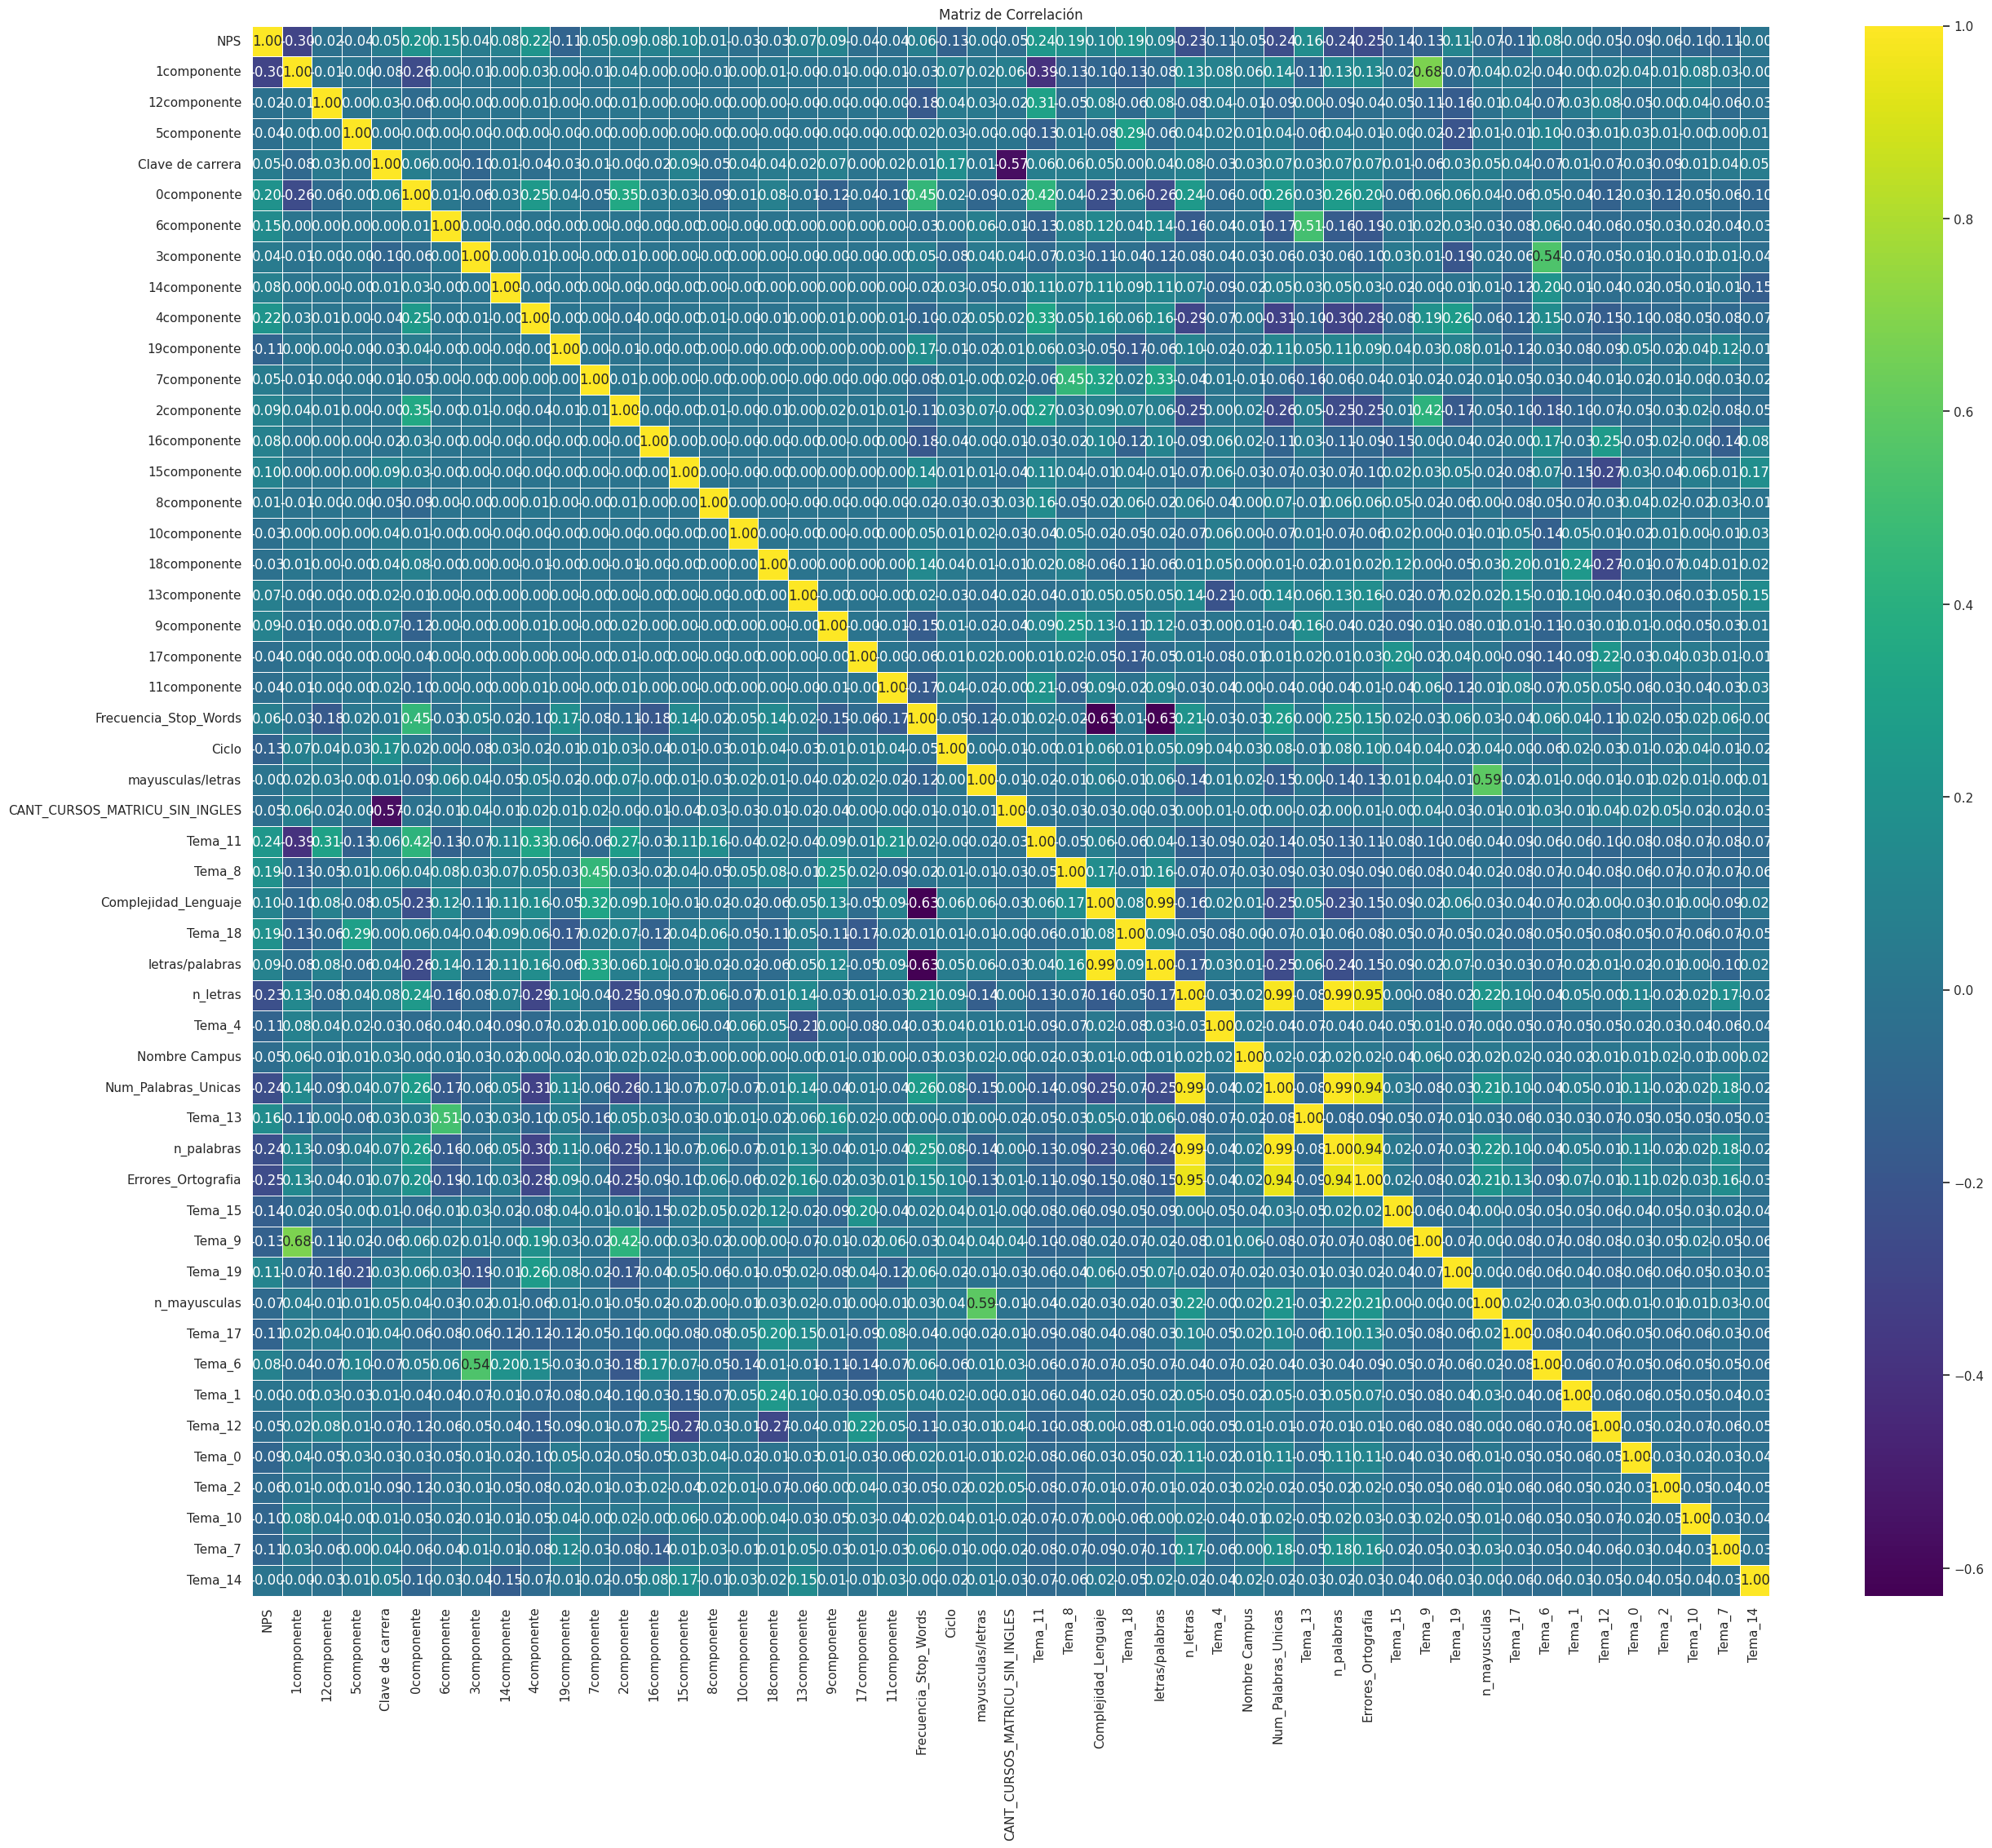

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columnas a mantener en el DataFrame filtrado
columns_to_keep = ["NPS",'1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

# Filtrar el DataFrame para mantener solo las columnas deseadas
df_train_filtered = train[columns_to_keep]

# Calcular la matriz de correlación
correlation_matrix = df_train_filtered.corr()

# Crear el gráfico de calor con tamaño ajustado
plt.figure(figsize=(30, 25))  # Aumentar el tamaño de la figura para mejorar la legibilidad
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
train2=train.copy()

In [ ]:
train2.shape

(20000, 144)

In [ ]:
# Guardar las primeras filas y la descripción del DataFrame en un archivo CSV

train2.to_csv('train2.csv')

In [ ]:
train['Sentimiento'].unique()

array(['4 stars', '2 stars', '5 stars', '1 star', '3 stars'], dtype=object)

Variable Sentimiento a **entero**

In [ ]:
#PARA EL TRAIN
train['Sentimiento'] = train['Sentimiento'].map({'5 stars' : 5, '4 stars' : 4,'3 stars' : 3,'2 stars' : 2,'1 star' : 1}).astype(int)
#PARA EL TEST
test['Sentimiento'] = test['Sentimiento'].map({'5 stars' : 5, '4 stars' : 4,'3 stars' : 3,'2 stars' : 2,'1 star' : 1}).astype(int)

train['Emocion'].unique()

#SELECCION DE VARIABLES

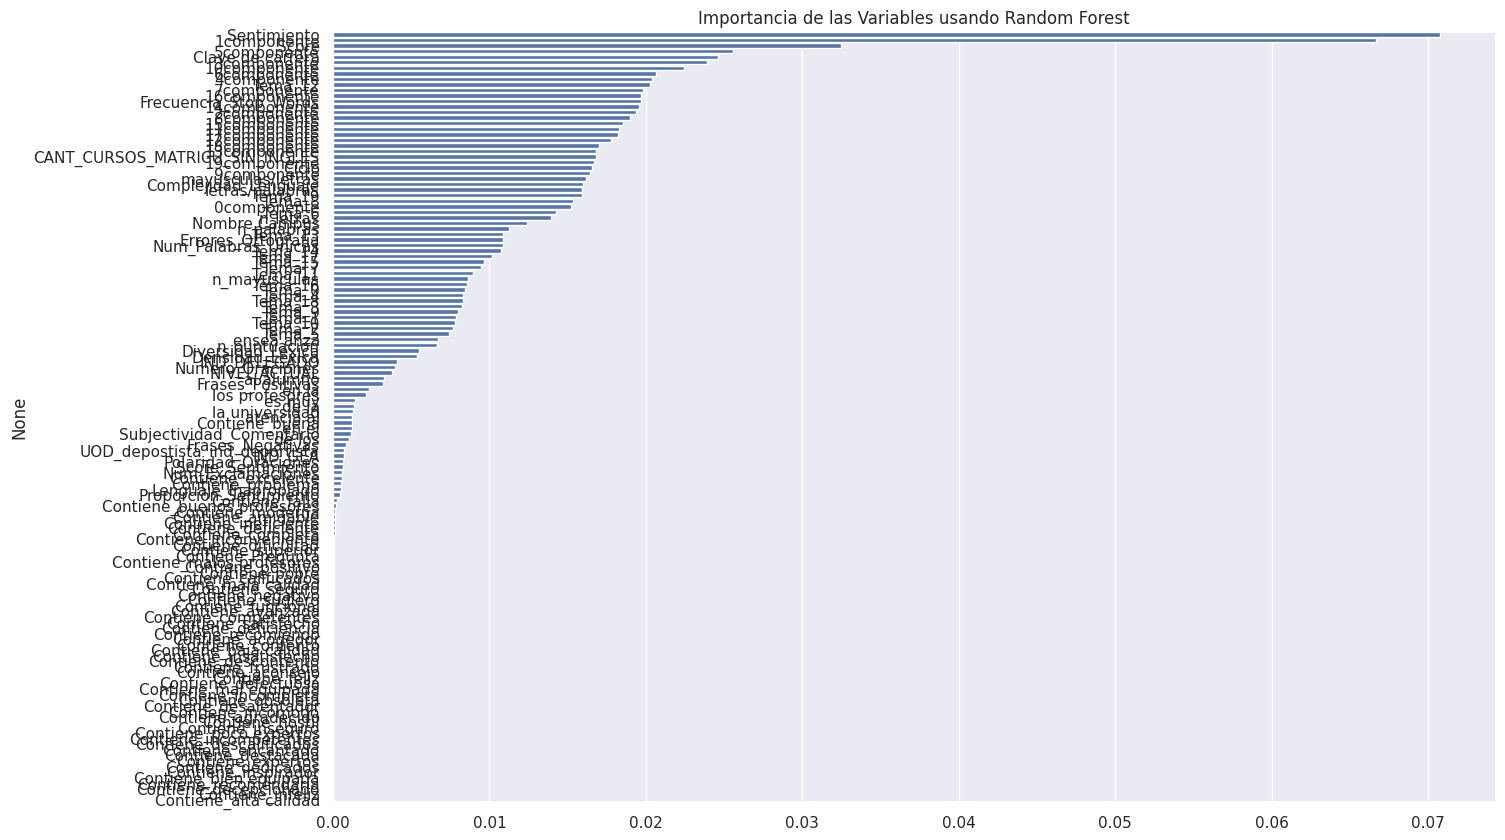

Las 10 mejores variables son: Index(['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar los datos
columns_to_remove1 = ["COD_ENCUESTADO", "COMENTARIO" , 'comentario_limpio', 'comentario_limpio_sin', 'Emocion']
df_train_filtered2 = train.drop(columns=columns_to_remove1, errors='ignore').dropna()

# Suponiendo que 'NPS' es la variable objetivo
X = df_train_filtered2.drop('NPS', axis=1)
y = df_train_filtered2['NPS']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener la importancia de las variables
importancias = rf.feature_importances_
indices = np.argsort(importancias)[::-1]
mejores_variables = X.columns[indices]

# Visualizar la importancia de las variables
plt.figure(figsize=(15, 10))
sns.barplot(x=importancias[indices], y=mejores_variables)
plt.title('Importancia de las Variables usando Random Forest')
plt.show()

# Seleccionar las mejores variables (por ejemplo, las 10 mejores)
mejores_variables_10 = mejores_variables[:50]
print("Las 10 mejores variables son:", mejores_variables_10)


In [ ]:
#train_columns = [x for x in train.columns if x not in ['COD_ENCUESTADO','Nombre Campus','NIVEL ACTUAL','COMENTARIO']]
#target = train['NPS']

#PREPARAR DATRA TRAIN Y TEST

In [ ]:
# Verificar las columnas en el DataFrame de entrenamiento
print("Columnas en el DataFrame de entrenamiento:")
print(train.columns)

# Verificar las columnas en el DataFrame de prueba
print("Columnas en el DataFrame de prueba:")
print(test.columns)

Columnas en el DataFrame de entrenamiento:
Index(['COD_ENCUESTADO', 'Nombre Campus', 'NIVEL ACTUAL', 'Clave de carrera',
       'Ciclo', 'COMENTARIO', 'IND_GEA', 'IND_DELEGADO',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'UOD_depostista_ind_deportista',
       ...
       'en la', 'ense anza', 'la universidad', 'los alumnos', 'los profesores',
       'Num_Palabras_Unicas', 'Densidad_Lexica', 'Contiene_Pregunta',
       'Num_Exclamaciones', 'Score_Sentimiento'],
      dtype='object', length=144)
Columnas en el DataFrame de prueba:
Index(['COD_ENCUESTADO', 'Nombre Campus', 'NIVEL ACTUAL', 'Clave de carrera',
       'Ciclo', 'COMENTARIO', 'IND_GEA', 'IND_DELEGADO',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'UOD_depostista_ind_deportista',
       ...
       'en la', 'ense anza', 'la universidad', 'los alumnos', 'los profesores',
       'Num_Palabras_Unicas', 'Densidad_Lexica', 'Contiene_Pregunta',
       'Num_Exclamaciones', 'Score_Sentimiento'],
      dtype='object', length=143)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr = train[mejores_variables_50]
ytr = train['NPS']

Xte = test[mejores_variables_50]

##Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Crear un conjunto de validación a partir del conjunto de entrenamiento
X_train_split, X_valid, y_train_split, y_valid = train_test_split(Xtr, ytr, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_split, y_train_split)

# Hacer predicciones en el conjunto de validación
y_valid_pred = rf.predict(X_valid)

# Evaluar el desempeño del modelo en el conjunto de validación
print("Random Forest Classifier en el conjunto de validación:")
print("Accuracy:", accuracy_score(y_valid, y_valid_pred))
print(classification_report(y_valid, y_valid_pred))

# Hacer predicciones en el conjunto de prueba (sin 'NPS')
y_valid_pred = rf.predict(X_valid)
y_valid_pred_proba = rf.predict_proba(X_valid)

print("Predicciones en el conjunto de prueba realizadas.")

# Evaluar el desempeño del modelo en el conjunto de validación
accuracy = accuracy_score(y_valid, y_valid_pred)
log_loss_valid = log_loss(y_valid, y_valid_pred_proba)

print("Random Forest Classifier en el conjunto de validación:")
print("Accuracy:", accuracy)

print("Log Loss:", log_loss_valid)
print(classification_report(y_valid, y_valid_pred))

# Hacer predicciones en el conjunto de prueba (sin 'NPS')
y_test_pred_proba = rf.predict_proba(Xte)

# Dado que no tenemos y_test, no podemos calcular el log loss para el conjunto de prueba.
# Solo se generarán las probabilidades de las predicciones.
print("Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)")

# Si deseas guardar las predicciones de probabilidad para análisis posterior:
predicciones_prueba = pd.DataFrame(y_test_pred_proba, columns=rf.classes_)
predicciones_prueba.to_csv("predicciones_probabilidad_test.csv", index=False)


Random Forest Classifier en el conjunto de validación:
Accuracy: 0.6859375
              precision    recall  f1-score   support

           1       0.25      0.03      0.06       158
           2       0.42      0.18      0.25       502
           3       0.63      0.79      0.70      1331
           4       0.81      0.87      0.84      1209

    accuracy                           0.69      3200
   macro avg       0.53      0.47      0.46      3200
weighted avg       0.65      0.69      0.65      3200

Predicciones en el conjunto de prueba realizadas.
Random Forest Classifier en el conjunto de validación:
Accuracy: 0.6859375
Log Loss: 0.8655519385077326
              precision    recall  f1-score   support

           1       0.25      0.03      0.06       158
           2       0.42      0.18      0.25       502
           3       0.63      0.79      0.70      1331
           4       0.81      0.87      0.84      1209

    accuracy                           0.69      3200
   macro a

In [ ]:
# Verificar duplicados en las mejores variables
print("Mejores Variables:", mejores_variables_50)
print("Variables Únicas:", len(set(mejores_variables_50)))
print("Total Variables:", len(mejores_variables_50))



Mejores Variables: ['Sentimiento', '1componente', 'Score', 'Clave de carrera', '5componente', '12componente', '6componente', '0componente', '3componente', '4componente', '16componente', '15componente', '14componente', '2componente', '7componente', '13componente', '8componente', 'Frecuencia_Stop_Words', '19componente', '10componente', '9componente', '18componente', '17componente', '11componente', 'CANT_CURSOS_MATRICU_SIN_INGLES', 'Ciclo', 'mayusculas/letras', 'Complejidad_Lenguaje', 'letras/palabras', 'Tema_18', 'Tema_8', 'n_letras', 'Tema_11', 'Nombre Campus', 'Tema_4', 'Tema_13', 'Num_Palabras_Unicas', 'Tema_9', 'n_palabras', 'Tema_19', 'Errores_Ortografia', 'Tema_15', 'n_mayusculas', 'Tema_1', 'Tema_17', 'Tema_6', 'Tema_10', 'Tema_2', 'Tema_3', 'Tema_14']
Variables Únicas: 50
Total Variables: 50


Regularización y ajuste de hiperparámetros en random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.model_selection import train_test_split, GridSearchCV

# Crear un conjunto de validación a partir del conjunto de entrenamiento
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Definir el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split)

# Mejor modelo
best_rf = grid_search.best_estimator_

# Hacer predicciones en el conjunto de validación
y_valid_pred = best_rf.predict(X_valid)
y_valid_pred_proba = best_rf.predict_proba(X_valid)

# Evaluar el desempeño del modelo en el conjunto de validación
accuracy = accuracy_score(y_valid, y_valid_pred)
log_loss_valid = log_loss(y_valid, y_valid_pred_proba)

print("Random Forest Classifier con Hiperparámetros Ajustados en el conjunto de validación:")
print("Accuracy:", accuracy)
print("Log Loss:", log_loss_valid)
print(classification_report(y_valid, y_valid_pred))

# Hacer predicciones en el conjunto de prueba (sin 'NPS')
y_test_pred_proba = best_rf.predict_proba(X_test)

print("Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)")

# Si deseas guardar las predicciones de probabilidad para análisis posterior:
predicciones_prueba = pd.DataFrame(y_test_pred_proba, columns=best_rf.classes_)
predicciones_prueba.to_csv("predicciones_probabilidad_test.csv", index=False)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Random Forest Classifier con Hiperparámetros Ajustados en el conjunto de validación:
Accuracy: 0.6810714285714285
Log Loss: 0.8109106429928056
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       156
           2       0.41      0.10      0.16       421
           3       0.60      0.82      0.69      1120
           4       0.81      0.86      0.83      1103

    accuracy                           0.68      2800
   macro avg       0.45      0.44      0.42      2800
weighted avg       0.62      0.68      0.63      2800

Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)


##Gradient boosting

##XGBoost

In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss
import xgboost as xgb

# Crear un conjunto de validación a partir del conjunto de entrenamiento
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustar las clases para que comiencen desde 0
y_train_split_adjusted = y_train_split - 1
y_valid_adjusted = y_valid - 1

# Definir el modelo
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [3, 6, 10],  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'subsample': [0.7, 0.8, 1.0],  # Submuestra de ratio de entrenamiento
    'colsample_bytree': [0.7, 0.8, 1.0],  # Submuestra de ratio de columnas por árbol
    'gamma': [0, 0.1, 0.2],  # Mínima pérdida de reducción necesaria para hacer una partición
    'min_child_weight': [1, 5, 10]  # Peso mínimo de sumas de hijo
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, y_train_split_adjusted)

# Mejor modelo
best_xgb = grid_search.best_estimator_


# Hacer predicciones en el conjunto de validación
y_valid_pred = best_xgb.predict(X_valid)
y_valid_pred_proba = best_xgb.predict_proba(X_valid)

# Evaluar el desempeño del modelo en el conjunto de validación
accuracy = accuracy_score(y_valid_adjusted, y_valid_pred)
log_loss_valid = log_loss(y_valid_adjusted, y_valid_pred_proba)

print("XGBoost Classifier con Hiperparámetros Ajustados en el conjunto de validación:")
print("Accuracy:", accuracy)
print("Log Loss:", log_loss_valid)
print(classification_report(y_valid_adjusted, y_valid_pred))

# Hacer predicciones en el conjunto de prueba (sin 'NPS')
y_test_pred_proba = best_xgb.predict_proba(X_test)

print("Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)")

# Si deseas guardar las predicciones de probabilidad para análisis posterior:
predicciones_prueba = pd.DataFrame(y_test_pred_proba, columns=best_xgb.classes_)
predicciones_prueba.to_csv("predicciones_probabilidad_test_xgb.csv", index=False)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


In [ ]:
test.shape

(8427, 126)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   1componente                     20000 non-null  float64
 1   12componente                    20000 non-null  float64
 2   5componente                     20000 non-null  float64
 3   0componente                     20000 non-null  float64
 4   4componente                     20000 non-null  float64
 5   Clave de carrera                20000 non-null  int64  
 6   6componente                     20000 non-null  float64
 7   16componente                    20000 non-null  float64
 8   19componente                    20000 non-null  float64
 9   14componente                    20000 non-null  float64
 10  3componente                     20000 non-null  float64
 11  7componente                     20000 non-null  float64
 12  15componente                    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss
import xgboost as xgb

# Supongo que X_train y y_train ya están definidos y preparados para su uso.

# Crear un conjunto de validación a partir del conjunto de entrenamiento
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustar las clases para que comiencen desde 0
y_train_split_adjusted = y_train_split - 1
y_valid_adjusted = y_valid - 1

# Definir el modelo
xgb_model = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento dividido
xgb_model.fit(X_train_split, y_train_split_adjusted)

# Hacer predicciones en el conjunto de validación
y_valid_pred = xgb_model.predict(X_valid)
y_valid_pred_proba = xgb_model.predict_proba(X_valid)

# Evaluar el desempeño del modelo en el conjunto de validación
accuracy = accuracy_score(y_valid_adjusted, y_valid_pred)
log_loss_valid = log_loss(y_valid_adjusted, y_valid_pred_proba)

print("XGBoost Classifier con Hiperparámetros Ajustados en el conjunto de validación:")
print("Accuracy:", accuracy)
print("Log Loss:", log_loss_valid)
print(classification_report(y_valid_adjusted, y_valid_pred))

# Hacer predicciones en el conjunto de prueba (sin 'NPS')
y_test_pred_proba = xgb_model.predict_proba(X_test)

print("Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)")

# Si deseas guardar las predicciones de probabilidad para análisis posterior:
predicciones_prueba = pd.DataFrame(y_test_pred_proba, columns=xgb_model.classes_)
predicciones_prueba.to_csv("predicciones_probabilidad_test_xgb.csv", index=False)


XGBoost Classifier con Hiperparámetros Ajustados en el conjunto de validación:
Accuracy: 0.66025
Log Loss: 0.8756003182736383
              precision    recall  f1-score   support

           0       0.22      0.04      0.06       214
           1       0.40      0.16      0.23       642
           2       0.61      0.78      0.68      1610
           3       0.78      0.84      0.81      1534

    accuracy                           0.66      4000
   macro avg       0.50      0.45      0.45      4000
weighted avg       0.62      0.66      0.62      4000

Predicciones en el conjunto de prueba realizadas. (Sin cálculo de Log Loss para el conjunto de prueba debido a la falta de y_test)


##RED NEURONAL

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y_train - 1, num_classes=4)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_one_hot, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = model.predict(X_test_scaled)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, target_names=[str(i) for i in range(1, 5)]))


Epoch 1/50
400/400 [==============================] - 9s 10ms/step - loss: 1.0725 - accuracy: 0.5594 - val_loss: 0.9107 - val_accuracy: 0.6419
Epoch 2/50
400/400 [==============================] - 2s 6ms/step - loss: 0.9599 - accuracy: 0.6175 - val_loss: 0.9085 - val_accuracy: 0.6466
Epoch 3/50
400/400 [==============================] - 3s 7ms/step - loss: 0.9311 - accuracy: 0.6330 - val_loss: 0.9087 - val_accuracy: 0.6497
Epoch 4/50
400/400 [==============================] - 4s 9ms/step - loss: 0.9195 - accuracy: 0.6372 - val_loss: 0.8778 - val_accuracy: 0.6547
Epoch 5/50
400/400 [==============================] - 3s 8ms/step - loss: 0.9047 - accuracy: 0.6422 - val_loss: 0.8756 - val_accuracy: 0.6513
Epoch 6/50
400/400 [==============================] - 2s 5ms/step - loss: 0.8960 - accuracy: 0.6430 - val_loss: 0.8672 - val_accuracy: 0.6528
Epoch 7/50
400/400 [==============================] - 2s 4ms/step - loss: 0.8864 - accuracy: 0.6469 - val_loss: 0.8686 - val_accuracy: 0.6566
Epoch

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#RECATEGORIZANDO TARGET

In [ ]:
train.shape

(20000, 144)

In [ ]:
test.shape

(8427, 143)

In [ ]:
import pandas as pd

# Supongamos que 'train' es tu DataFrame original y 'NPS' es tu columna objetivo

# Crear las copias del DataFrame
train_m1 = train.copy()
train_m2 = train.copy()
train_m3 = train.copy()
train_m4 = train.copy()

# Ajustar la columna 'NPS' según las condiciones especificadas

# Copia 1: 1 y 0, donde 1 es 1 y 0 es 2, 3, 4
train_m1['NPS'] = train_m1['NPS'].apply(lambda x: 1 if x == 1 else 0)

# Copia 2: 1 y 0, donde 1 es 2 y 0 es 1, 3, 4
train_m2['NPS'] = train_m2['NPS'].apply(lambda x: 1 if x == 2 else 0)

# Copia 3: 1 y 0, donde 1 es 3 y 0 es 1, 2, 4
train_m3['NPS'] = train_m3['NPS'].apply(lambda x: 1 if x == 3 else 0)

# Copia 4: 1 y 0, donde 1 es 4 y 0 es 1, 2, 3
train_m4['NPS'] = train_m4['NPS'].apply(lambda x: 1 if x == 4 else 0)

# Verificar los cambios
print("Copia 1 - Distribución de NPS:")
print(train_m1['NPS'].value_counts())

print("Copia 2 - Distribución de NPS:")
print(train_m2['NPS'].value_counts())

print("Copia 3 - Distribución de NPS:")
print(train_m3['NPS'].value_counts())

print("Copia 4 - Distribución de NPS:")
print(train_m4['NPS'].value_counts())


Copia 1 - Distribución de NPS:
NPS
0    15162
1      838
Name: count, dtype: int64
Copia 2 - Distribución de NPS:
NPS
0    13541
1     2459
Name: count, dtype: int64
Copia 3 - Distribución de NPS:
NPS
0    9473
1    6527
Name: count, dtype: int64
Copia 4 - Distribución de NPS:
NPS
0    9824
1    6176
Name: count, dtype: int64


##PARA CATEGORIA 1

In [ ]:
train_m1.shape

(20000, 144)

In [ ]:
#OPCION 1 : 50 MEJORES VARIABLES

import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr1 = train_m1[mejores_variables_50]
ytr1 = train_m1['NPS']

Xte1 = test[mejores_variables_50]

In [ ]:
#OPCION 2 : 50 MEJORES VARIABLES

import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr1 = train_m1[mejores_variables_50]
ytr1 = train_m1['NPS']

Xte1 = test[mejores_variables_50]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one_hot1 = to_categorical(ytr1, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr1, y_one_hot1, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train1_scaled, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test1_pred_proba = model.predict(X_test1_scaled)
y_test1_pred = np.argmax(y_test1_pred_proba, axis=1)
y_test1_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test1_true, y_test1_pred)
log_loss_value = log_loss(y_test1, y_test1_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test1_true, y_test1_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))


Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.2171 - accuracy: 0.9463 - val_loss: 0.1906 - val_accuracy: 0.9472
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1903 - accuracy: 0.9466 - val_loss: 0.1872 - val_accuracy: 0.9475
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.1840 - accuracy: 0.9469 - val_loss: 0.1807 - val_accuracy: 0.9475
Epoch 4/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1822 - accuracy: 0.9469 - val_loss: 0.1803 - val_accuracy: 0.9475
Epoch 5/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1776 - accuracy: 0.9473 - val_loss: 0.1801 - val_accuracy: 0.9478
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.1762 - accuracy: 0.9465 - val_loss: 0.1810 - val_accuracy: 0.9475
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.1718 - accuracy: 0.9473 - val_loss: 0.1820 - val_accuracy: 0.9453
Epoch 

###balanceo1

In [ ]:
count_class_0, count_class_1 = train_m1.NPS.value_counts()

# Divide by class
df_class1_0 = train_m1[train_m1['NPS'] == 0]
df_class1_1 = train_m1[train_m1['NPS'] == 1]

In [ ]:
count_class_0, len(df_class1_0), count_class_1, len(df_class1_1)

(15162, 15162, 838, 838)

Random over-sampling:
NPS
0    15162
1    15162
Name: count, dtype: int64


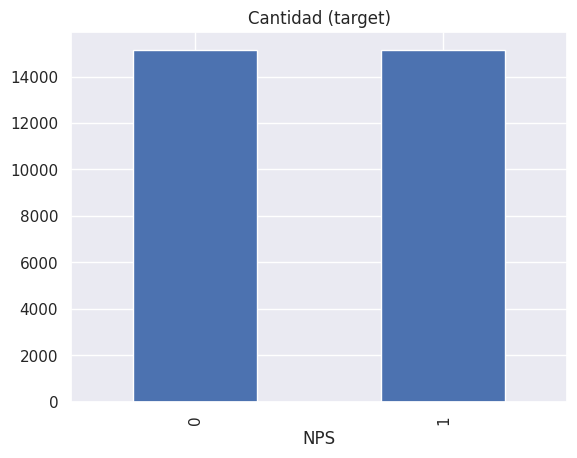

In [ ]:
df_class1_1_over = df_class1_1.sample(count_class_0, replace=True)
df_train1_over = pd.concat([df_class1_0, df_class1_1_over], axis=0)

print('Random over-sampling:')
print(df_train1_over.NPS.value_counts())

df_train1_over.NPS.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
df_train1_over.shape

(30324, 144)

In [ ]:
#OPCION 1 : 50 MEJORES VARIABLES

import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr1over = df_train1_over[mejores_variables_50]
ytr1over = df_train1_over['NPS']

Xte1 = test[mejores_variables_50]

In [ ]:
#OPCION 2 : 50 MEJORES VARIABLES

import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr1over = df_train1_over[mejores_variables_50]
ytr1over = df_train1_over['NPS']

Xte1 = test[mejores_variables_50]


####Red Neuronal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr1over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr1over, y_one1_hot1, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

X_test1_final = scaler.transform(Xte1)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train1.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train1_scaled, y_train1, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba_final = model.predict(X_test1_final)

y_test_pred_proba = model.predict(X_test1_scaled)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
607/607 [==============================] - 6s 5ms/step - loss: 0.5950 - accuracy: 0.6774 - val_loss: 0.5163 - val_accuracy: 0.7424
Epoch 2/50
607/607 [==============================] - 2s 4ms/step - loss: 0.5149 - accuracy: 0.7444 - val_loss: 0.4863 - val_accuracy: 0.7576
Epoch 3/50
607/607 [==============================] - 2s 4ms/step - loss: 0.4945 - accuracy: 0.7543 - val_loss: 0.4713 - val_accuracy: 0.7671
Epoch 4/50
607/607 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7664 - val_loss: 0.4577 - val_accuracy: 0.7830
Epoch 5/50
607/607 [==============================] - 1s 2ms/step - loss: 0.4669 - accuracy: 0.7726 - val_loss: 0.4447 - val_accuracy: 0.7935
Epoch 6/50
607/607 [==============================] - 2s 3ms/step - loss: 0.4545 - accuracy: 0.7795 - val_loss: 0.4421 - val_accuracy: 0.8116
Epoch 7/50
607/607 [==============================] - 2s 4ms/step - loss: 0.4408 - accuracy: 0.7898 - val_loss: 0.4176 - val_accuracy: 0.8188
Epoch 

In [ ]:
pd1 = pd.DataFrame(y_test_pred_proba_final)
df_concat = pd.concat([test['COD_ENCUESTADO'], pd1[1]], axis=1)
df_concat.head()

,COD_ENCUESTADO,1
0,27398,5.905622e-02
1,25686,2.169263e-11
2,449,4.979821e-27
3,26681,5.977140e-35
4,3341,1.078146e-03


####Máquinas de Aprendizaje Extremo (ELM)

In [ ]:
!pip install hpelm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import hpelm

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr1over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr1over, y_one1_hot1, test_size=0.2, random_state=42)

# Definiendo Funcion
class ELMClassifier:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_weights = None

    def fit(self, X, y):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        self.output_weights = np.linalg.pinv(H).dot(y)

    def predict(self, X):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        return np.dot(H, self.output_weights)

# Crear y entrenar el clasificador ELM

input_size = X_train1.shape[1]
hidden_size = 1000  # Número de neuronas en la capa oculta
output_size = len(np.unique(y_train1))  # Número de clases
elm = ELMClassifier(input_size, hidden_size, output_size)
elm.fit(X_train1, y_train1)


# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = elm.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Accuracy en el conjunto de prueba: 0.7939545934530094
Log Loss en el conjunto de prueba: 0.6562242302738427
              precision    recall  f1-score   support

     Clase 0       0.82      0.74      0.78      3759
     Clase 1       0.77      0.84      0.80      3817

    accuracy                           0.79      7576
   macro avg       0.80      0.79      0.79      7576
weighted avg       0.80      0.79      0.79      7576



In [ ]:
y_test_pred_proba

array([[2.87198307e-14, 1.88592848e-15],
       [8.61374706e-06, 7.31850785e-05],
       [1.88825748e-11, 5.59612579e-18],
       ...,
       [1.04025401e-11, 2.53616133e-09],
       [2.52720526e-03, 8.76004868e-02],
       [8.25566869e-07, 1.35898966e-15]])

####Redes de Función de Base Radial (RBF)

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr1over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr1over, y_one1_hot1, test_size=0.2, random_state=42)

# Definir el clasificador RBF
class RBFClassifier:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Seleccionar centros aleatorios
        idx = np.random.choice(X.shape[0], self.num_centers, replace=False)
        self.centers = X[idx]
        # Calcular activaciones RBF
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        # Resolver sistema lineal para obtener los pesos de salida
        self.weights = np.linalg.lstsq(RBF, y, rcond=None)[0]

    def predict(self, X):
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        return np.dot(RBF, self.weights)

# Asegurarse de que X_train1 y X_test1 son numpy arrays
if isinstance(X_train1, pd.DataFrame):
    X_train1 = X_train1.values
if isinstance(X_test1, pd.DataFrame):
    X_test1 = X_test1.values

# Verificar las formas de los datos
print("Forma de X_train1:", X_train1.shape)
print("Forma de y_train1:", y_train1.shape)
print("Forma de X_test1:", X_test1.shape)
print("Forma de y_test1:", y_test1.shape)

# Definir el número de centros (neuronas)
num_centers = 1000

# Crear y entrenar el clasificador RBF
rbf = RBFClassifier(num_centers)
rbf.fit(X_train1, y_train1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = rbf.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Forma de X_train1: (30302, 50)
Forma de y_train1: (30302, 2)
Forma de X_test1: (7576, 50)
Forma de y_test1: (7576, 2)
Accuracy en el conjunto de prueba: 0.6725184794086589
Log Loss en el conjunto de prueba: 1.399962675610941
              precision    recall  f1-score   support

     Clase 0       0.68      0.65      0.66      3759
     Clase 1       0.67      0.70      0.68      3817

    accuracy                           0.67      7576
   macro avg       0.67      0.67      0.67      7576
weighted avg       0.67      0.67      0.67      7576



##PARA CATEGORIA 2

In [ ]:
train_m2.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,...,en la,ense anza,la universidad,los alumnos,los profesores,Num_Palabras_Unicas,Densidad_Lexica,Contiene_Pregunta,Num_Exclamaciones,Score_Sentimiento
0,13501,1,3,3,2,Me gusta la u es paja bro y soy pito,0,1,6.0,0,...,0.0,0.0,0.0,0.0,0.000000,10,1.000000,0,0,0.0
1,23622,3,3,25,1,El metodo de blended no le hace bien a todos,0,1,5.0,0,...,0.0,0.0,0.0,0.0,0.000000,10,1.000000,0,0,0.0
2,8354,4,3,31,1,"Los profesores, sus m_todos de enseÐanza bes ...",0,0,5.0,0,...,0.0,0.0,0.0,0.0,0.704834,25,0.862069,0,0,0.0
3,17745,4,3,28,6,Porque posee gran mayorÕa de profesores espec...,1,0,6.0,1,...,0.0,0.0,0.0,0.0,0.000000,11,1.000000,0,0,0.0
4,10867,3,3,34,1,La pencion,0,0,6.0,0,...,0.0,0.0,0.0,0.0,0.000000,2,1.000000,0,0,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr2 = train_m2[mejores_variables_50]
ytr2 = train_m2['NPS']

Xte2 = test[mejores_variables_50]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one_hot2 = to_categorical(ytr2 , num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtr2, y_one_hot2, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train2_scaled, y_train2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test2_pred_proba = model.predict(X_test2_scaled)
y_test2_pred = np.argmax(y_test2_pred_proba, axis=1)
y_test2_true = np.argmax(y_test2, axis=1)

accuracy = accuracy_score(y_test2_true, y_test2_pred)
log_loss_value = log_loss(y_test2, y_test2_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test2_true, y_test2_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.4363 - accuracy: 0.8430 - val_loss: 0.4135 - val_accuracy: 0.8509
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4055 - accuracy: 0.8448 - val_loss: 0.3918 - val_accuracy: 0.8509
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8444 - val_loss: 0.3954 - val_accuracy: 0.8509
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8445 - val_loss: 0.3847 - val_accuracy: 0.8509
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8447 - val_loss: 0.3904 - val_accuracy: 0.8509
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3901 - accuracy: 0.8447 - val_loss: 0.3834 - val_accuracy: 0.8509
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.3881 - accuracy: 0.8446 - val_loss: 0.3815 - val_accuracy: 0.8509
Epoch 

###balanceo2 overfsampling

In [ ]:
count_class2_0, count_class2_1 = train_m2.NPS.value_counts()
df_class2_0 = train_m2[train_m2['NPS'] == 0]
df_class2_1 = train_m2[train_m2['NPS'] == 1]

In [ ]:
count_class2_0, len(df_class2_0), count_class2_1, len(df_class2_1)

(13541, 13541, 2459, 2459)

Random over-sampling:
NPS
0    13541
1    13541
Name: count, dtype: int64


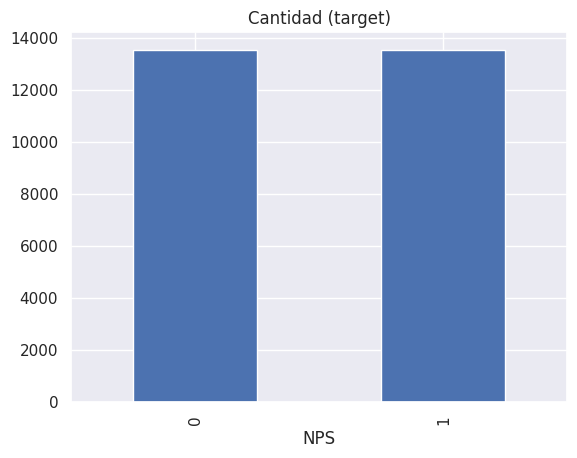

In [ ]:
df_class2_1_over = df_class2_1.sample(count_class2_0, replace=True)
df_train2_over = pd.concat([df_class2_0, df_class2_1_over], axis=0)

print('Random over-sampling:')
print(df_train2_over.NPS.value_counts())

df_train2_over.NPS.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
df_train2_over.shape

(27082, 144)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr2over = df_train2_over[mejores_variables_50]
ytr2over = df_train2_over['NPS']

Xte2 = test[mejores_variables_50]

####Red Neuronal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one2_hot1 = to_categorical(ytr2over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xtr2over, y_one2_hot1, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

X_test2_final = scaler.transform(Xte2)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train2.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train2_scaled, y_train2, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test2_pred_proba_final = model.predict(X_test2_final)

y_test2_pred_proba = model.predict(X_test2_scaled)
y_test2_pred = np.argmax(y_test2_pred_proba, axis=1)
y_test2_true = np.argmax(y_test2, axis=1)

accuracy = accuracy_score(y_test2_true, y_test2_pred)
log_loss_value = log_loss(y_test2, y_test2_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test2_true, y_test2_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
474/474 [==============================] - 2s 3ms/step - loss: 0.6338 - accuracy: 0.6379 - val_loss: 0.5605 - val_accuracy: 0.7155
Epoch 2/50
474/474 [==============================] - 1s 2ms/step - loss: 0.5810 - accuracy: 0.7033 - val_loss: 0.5524 - val_accuracy: 0.7286
Epoch 3/50
474/474 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.7168 - val_loss: 0.5419 - val_accuracy: 0.7300
Epoch 4/50
474/474 [==============================] - 2s 3ms/step - loss: 0.5557 - accuracy: 0.7201 - val_loss: 0.5437 - val_accuracy: 0.7339
Epoch 5/50
474/474 [==============================] - 2s 4ms/step - loss: 0.5473 - accuracy: 0.7256 - val_loss: 0.5375 - val_accuracy: 0.7376
Epoch 6/50
474/474 [==============================] - 1s 3ms/step - loss: 0.5427 - accuracy: 0.7307 - val_loss: 0.5352 - val_accuracy: 0.7363
Epoch 7/50
474/474 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7319 - val_loss: 0.5389 - val_accuracy: 0.7402
Epoch 

In [ ]:
pd1 = pd.DataFrame(y_test2_pred_proba_final, columns=[0, 2])
pd1.head()

,0,2
0,0.977415,2.258506e-02
1,0.989916,1.008412e-02
2,1.000000,1.039700e-09
3,1.000000,3.690251e-07
4,0.231116,7.688845e-01


In [ ]:
pd1 = pd.DataFrame(y_test2_pred_proba_final, columns=[0, 2])
df_concat2 = pd.concat([df_concat, pd1[2]], axis=1)
df_concat2.head()

,COD_ENCUESTADO,1,2
0,27398,5.905622e-02,2.258506e-02
1,25686,2.169263e-11,1.008412e-02
2,449,4.979821e-27,1.039700e-09
3,26681,5.977140e-35,3.690251e-07
4,3341,1.078146e-03,7.688845e-01


####ELM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import hpelm

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr2over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr2over, y_one1_hot1, test_size=0.3, random_state=42)

# Definiendo Funcion
class ELMClassifier:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_weights = None

    def fit(self, X, y):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        self.output_weights = np.linalg.pinv(H).dot(y)

    def predict(self, X):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        return np.dot(H, self.output_weights)

# Crear y entrenar el clasificador ELM

input_size = X_train1.shape[1]
hidden_size = 1000  # Número de neuronas en la capa oculta
output_size = len(np.unique(y_train1))  # Número de clases
elm = ELMClassifier(input_size, hidden_size, output_size)
elm.fit(X_train1, y_train1)


# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = elm.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Accuracy en el conjunto de prueba: 0.6943567482241515
Log Loss en el conjunto de prueba: 0.7552570055574823
              precision    recall  f1-score   support

     Clase 0       0.72      0.64      0.68      5096
     Clase 1       0.67      0.75      0.71      5040

    accuracy                           0.69     10136
   macro avg       0.70      0.69      0.69     10136
weighted avg       0.70      0.69      0.69     10136



####RBF

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr2over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr2over, y_one1_hot1, test_size=0.3, random_state=42)

# Definir el clasificador RBF
class RBFClassifier:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Seleccionar centros aleatorios
        idx = np.random.choice(X.shape[0], self.num_centers, replace=False)
        self.centers = X[idx]
        # Calcular activaciones RBF
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        # Resolver sistema lineal para obtener los pesos de salida
        self.weights = np.linalg.lstsq(RBF, y, rcond=None)[0]

    def predict(self, X):
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        return np.dot(RBF, self.weights)

# Asegurarse de que X_train1 y X_test1 son numpy arrays
if isinstance(X_train1, pd.DataFrame):
    X_train1 = X_train1.values
if isinstance(X_test1, pd.DataFrame):
    X_test1 = X_test1.values

# Verificar las formas de los datos
print("Forma de X_train1:", X_train1.shape)
print("Forma de y_train1:", y_train1.shape)
print("Forma de X_test1:", X_test1.shape)
print("Forma de y_test1:", y_test1.shape)

# Definir el número de centros (neuronas)
num_centers = 1000

# Crear y entrenar el clasificador RBF
rbf = RBFClassifier(num_centers)
rbf.fit(X_train1, y_train1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = rbf.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Forma de X_train1: (23650, 50)
Forma de y_train1: (23650, 2)
Forma de X_test1: (10136, 50)
Forma de y_test1: (10136, 2)
Accuracy en el conjunto de prueba: 0.5617600631412786
Log Loss en el conjunto de prueba: 1.5247115720961684
              precision    recall  f1-score   support

     Clase 0       0.56      0.59      0.57      5096
     Clase 1       0.56      0.54      0.55      5040

    accuracy                           0.56     10136
   macro avg       0.56      0.56      0.56     10136
weighted avg       0.56      0.56      0.56     10136



###balanceo2 undersampling

In [ ]:
count_class2_0, count_class2_1 = train_m2.NPS.value_counts()
df_class2_0 = train_m2[train_m2['NPS'] == 0]
df_class2_1 = train_m2[train_m2['NPS'] == 1]

In [ ]:
count_class2_0, len(df_class2_0), count_class2_1, len(df_class2_1)

(16893, 16893, 3107, 3107)

Estrategia de Muestreo under-sampling:
NPS
0    3107
1    3107
Name: count, dtype: int64


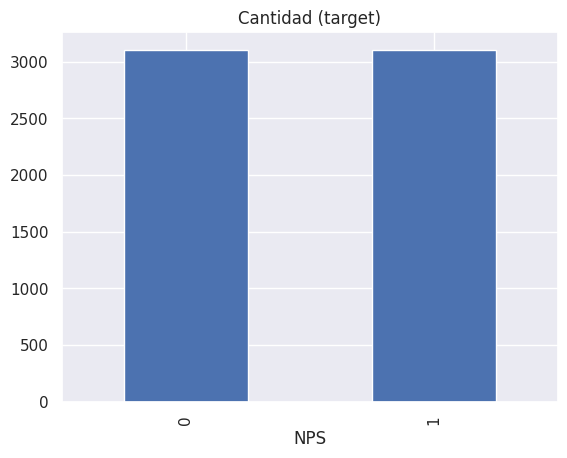

In [ ]:
df_class2_0_under = df_class2_0.sample(count_class2_1,random_state=1206)
df_train2_under = pd.concat([df_class2_0_under, df_class2_1], axis=0)

print('Estrategia de Muestreo under-sampling:')
print(df_train2_under.NPS.value_counts())

df_train2_under.NPS.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr2under = df_train2_under[mejores_variables_50]
ytr2under = df_train2_under['NPS']

Xte2 = test[mejores_variables_50]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one2u_hot1 = to_categorical(ytr2under, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train2u, X_test2u, y_train2u, y_test2u = train_test_split(Xtr2under, y_one2u_hot1, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train2u_scaled = scaler.fit_transform(X_train2u)
X_test2u_scaled = scaler.transform(X_test2u)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train2u.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train2u_scaled, y_train2u, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test2u_pred_proba = model.predict(X_test2u_scaled)
y_test2u_pred = np.argmax(y_test2u_pred_proba, axis=1)
y_test2u_true = np.argmax(y_test2u, axis=1)

accuracy = accuracy_score(y_test2u_true, y_test2u_pred)
log_loss_value = log_loss(y_test2u, y_test2u_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test2u_true, y_test2u_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
125/125 [==============================] - 1s 4ms/step - loss: 0.7476 - accuracy: 0.5340 - val_loss: 0.6685 - val_accuracy: 0.6010
Epoch 2/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.5946 - val_loss: 0.6589 - val_accuracy: 0.6171
Epoch 3/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6074 - val_loss: 0.6461 - val_accuracy: 0.6241
Epoch 4/50
125/125 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.6283 - val_loss: 0.6418 - val_accuracy: 0.6342
Epoch 5/50
125/125 [==============================] - 0s 3ms/step - loss: 0.6307 - accuracy: 0.6411 - val_loss: 0.6408 - val_accuracy: 0.6312
Epoch 6/50
125/125 [==============================] - 0s 4ms/step - loss: 0.6217 - accuracy: 0.6456 - val_loss: 0.6364 - val_accuracy: 0.6372
Epoch 7/50
125/125 [==============================] - 0s 4ms/step - loss: 0.6186 - accuracy: 0.6585 - val_loss: 0.6325 - val_accuracy: 0.6523
Epoch 

##PARA CATEGORIA 3

In [ ]:
train_m3.shape

(20000, 142)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr3 = train_m3[mejores_variables_50]
ytr3 = train_m3['NPS']

Xte3 = test[mejores_variables_50]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one_hot3 = to_categorical(ytr3, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xtr3, y_one_hot3, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train3.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train3_scaled, y_train3, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test3_pred_proba = model.predict(X_test3_scaled)
y_test3_pred = np.argmax(y_test3_pred_proba, axis=1)
y_test3_true = np.argmax(y_test3, axis=1)

accuracy = accuracy_score(y_test3_true, y_test3_pred)
log_loss_value = log_loss(y_test3, y_test3_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test3_true, y_test3_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.6474 - accuracy: 0.6223 - val_loss: 0.5768 - val_accuracy: 0.6978
Epoch 2/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.6746 - val_loss: 0.5610 - val_accuracy: 0.7053
Epoch 3/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5784 - accuracy: 0.6870 - val_loss: 0.5556 - val_accuracy: 0.7116
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5737 - accuracy: 0.6973 - val_loss: 0.5598 - val_accuracy: 0.7150
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.7034 - val_loss: 0.5538 - val_accuracy: 0.7109
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5580 - accuracy: 0.7064 - val_loss: 0.5506 - val_accuracy: 0.7178
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.5580 - accuracy: 0.7081 - val_loss: 0.5512 - val_accuracy: 0.7150
Epoch 

###balanceo3

In [ ]:
count_class3_0, count_class3_1 = train_m3.NPS.value_counts()
df_class3_0 = train_m3[train_m3['NPS'] == 0]
df_class3_1 = train_m3[train_m3['NPS'] == 1]

In [ ]:
count_class3_0, len(df_class3_0), count_class3_1, len(df_class3_1)

(9473, 9473, 6527, 6527)

Random over-sampling:
NPS
0    9473
1    9473
Name: count, dtype: int64


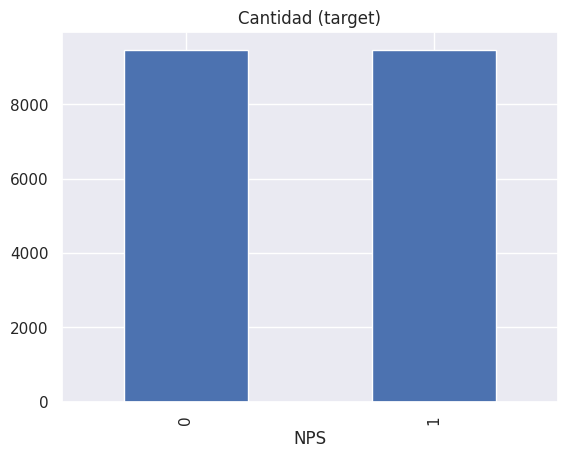

In [ ]:
df_class3_1_over = df_class3_1.sample(count_class3_0, replace=True)
df_train3_over = pd.concat([df_class3_0, df_class3_1_over], axis=0)

print('Random over-sampling:')
print(df_train3_over.NPS.value_counts())

df_train3_over.NPS.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr3over = df_train3_over[mejores_variables_50]
ytr3over = df_train3_over['NPS']

Xte3 = test[mejores_variables_50]

####Red Neuronal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one3_hot1 = to_categorical(ytr3over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xtr3over, y_one3_hot1, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train3_scaled = scaler.fit_transform(X_train3)
X_test3_scaled = scaler.transform(X_test3)

X_test3_final = scaler.transform(Xte3)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train3.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train3_scaled, y_train3, epochs=50, batch_size=32, validation_split=0.3, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test3_pred_proba_final = model.predict(X_test3_final)

y_test3_pred_proba = model.predict(X_test3_scaled)
y_test3_pred = np.argmax(y_test3_pred_proba, axis=1)
y_test3_true = np.argmax(y_test3, axis=1)

accuracy = accuracy_score(y_test3_true, y_test3_pred)
log_loss_value = log_loss(y_test3, y_test3_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test3_true, y_test3_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
332/332 [==============================] - 2s 3ms/step - loss: 0.6578 - accuracy: 0.6225 - val_loss: 0.5731 - val_accuracy: 0.7055
Epoch 2/50
332/332 [==============================] - 1s 4ms/step - loss: 0.5954 - accuracy: 0.6845 - val_loss: 0.5637 - val_accuracy: 0.7060
Epoch 3/50
332/332 [==============================] - 1s 4ms/step - loss: 0.5775 - accuracy: 0.6978 - val_loss: 0.5573 - val_accuracy: 0.7152
Epoch 4/50
332/332 [==============================] - 1s 4ms/step - loss: 0.5669 - accuracy: 0.7091 - val_loss: 0.5585 - val_accuracy: 0.7128
Epoch 5/50
332/332 [==============================] - 1s 3ms/step - loss: 0.5592 - accuracy: 0.7143 - val_loss: 0.5505 - val_accuracy: 0.7139
Epoch 6/50
332/332 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7146 - val_loss: 0.5417 - val_accuracy: 0.7178
Epoch 7/50
332/332 [==============================] - 1s 2ms/step - loss: 0.5502 - accuracy: 0.7183 - val_loss: 0.5444 - val_accuracy: 0.7233
Epoch 

In [ ]:
pd1 = pd.DataFrame(y_test3_pred_proba_final, columns=[0, 3])
df_concat3 = pd.concat([df_concat2, pd1[3]], axis=1)
df_concat3.head()

,COD_ENCUESTADO,1,2,3
0,27398,5.905622e-02,2.258506e-02,0.283772
1,25686,2.169263e-11,1.008412e-02,0.031921
2,449,4.979821e-27,1.039700e-09,0.078734
3,26681,5.977140e-35,3.690251e-07,0.059496
4,3341,1.078146e-03,7.688845e-01,0.409114


####ELM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import hpelm

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr3over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr3over, y_one1_hot1, test_size=0.2, random_state=42)

# Definiendo Funcion
class ELMClassifier:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_weights = None

    def fit(self, X, y):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        self.output_weights = np.linalg.pinv(H).dot(y)

    def predict(self, X):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        return np.dot(H, self.output_weights)

# Crear y entrenar el clasificador ELM

input_size = X_train1.shape[1]
hidden_size = 1000  # Número de neuronas en la capa oculta
output_size = len(np.unique(y_train1))  # Número de clases
elm = ELMClassifier(input_size, hidden_size, output_size)
elm.fit(X_train1, y_train1)


# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = elm.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Accuracy en el conjunto de prueba: 0.7159713442899284
Log Loss en el conjunto de prueba: 0.7863049377967704
              precision    recall  f1-score   support

     Clase 0       0.72      0.69      0.71      2350
     Clase 1       0.71      0.74      0.72      2396

    accuracy                           0.72      4746
   macro avg       0.72      0.72      0.72      4746
weighted avg       0.72      0.72      0.72      4746



####RBF

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr3over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr3over, y_one1_hot1, test_size=0.2, random_state=42)

# Definir el clasificador RBF
class RBFClassifier:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Seleccionar centros aleatorios
        idx = np.random.choice(X.shape[0], self.num_centers, replace=False)
        self.centers = X[idx]
        # Calcular activaciones RBF
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        # Resolver sistema lineal para obtener los pesos de salida
        self.weights = np.linalg.lstsq(RBF, y, rcond=None)[0]

    def predict(self, X):
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        return np.dot(RBF, self.weights)

# Asegurarse de que X_train1 y X_test1 son numpy arrays
if isinstance(X_train1, pd.DataFrame):
    X_train1 = X_train1.values
if isinstance(X_test1, pd.DataFrame):
    X_test1 = X_test1.values

# Verificar las formas de los datos
print("Forma de X_train1:", X_train1.shape)
print("Forma de y_train1:", y_train1.shape)
print("Forma de X_test1:", X_test1.shape)
print("Forma de y_test1:", y_test1.shape)

# Definir el número de centros (neuronas)
num_centers = 1000

# Crear y entrenar el clasificador RBF
rbf = RBFClassifier(num_centers)
rbf.fit(X_train1, y_train1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = rbf.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Forma de X_train1: (18982, 50)
Forma de y_train1: (18982, 2)
Forma de X_test1: (4746, 50)
Forma de y_test1: (4746, 2)
Accuracy en el conjunto de prueba: 0.5408765276021913
Log Loss en el conjunto de prueba: 1.44346610986173
              precision    recall  f1-score   support

     Clase 0       0.54      0.54      0.54      2350
     Clase 1       0.55      0.55      0.55      2396

    accuracy                           0.54      4746
   macro avg       0.54      0.54      0.54      4746
weighted avg       0.54      0.54      0.54      4746



##PARA CATEGORIA 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['1componente', '12componente', '5componente', 'Clave de carrera',
       '0componente', '6componente', '3componente', '14componente',
       '4componente', '19componente', '7componente', '2componente',
       '16componente', '15componente', '8componente', '10componente',
       '18componente', '13componente', '9componente', '17componente',
       '11componente', 'Frecuencia_Stop_Words', 'Ciclo', 'mayusculas/letras',
       'CANT_CURSOS_MATRICU_SIN_INGLES', 'Tema_11', 'Tema_8',
       'Complejidad_Lenguaje', 'Tema_18', 'letras/palabras', 'n_letras',
       'Tema_4', 'Nombre Campus', 'Num_Palabras_Unicas', 'Tema_13',
       'n_palabras', 'Errores_Ortografia', 'Tema_15', 'Tema_9', 'Tema_19',
       'n_mayusculas', 'Tema_17', 'Tema_6', 'Tema_1', 'Tema_12', 'Tema_0',
       'Tema_2', 'Tema_10', 'Tema_7', 'Tema_14']

Xtr4 = train_m4[mejores_variables_50]
ytr4 = train_m4['NPS']

Xte4 = test[mejores_variables_50]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one_hot4 = to_categorical(ytr4 , num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train4, X_test4, y_train4, y_test4 = train_test_split(Xtr4, y_one_hot4, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)
X_test4_scaled = scaler.transform(X_test4)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train4.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 4 clases

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train4_scaled, y_train4, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test4_pred_proba = model.predict(X_test4_scaled)
y_test4_pred = np.argmax(y_test4_pred_proba, axis=1)
y_test4_true = np.argmax(y_test4, axis=1)

accuracy = accuracy_score(y_test4_true, y_test4_pred)
log_loss_value = log_loss(y_test4, y_test4_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test4_true, y_test4_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
400/400 [==============================] - 2s 3ms/step - loss: 0.5356 - accuracy: 0.7355 - val_loss: 0.4178 - val_accuracy: 0.8194
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 0.4407 - accuracy: 0.8037 - val_loss: 0.4105 - val_accuracy: 0.8200
Epoch 3/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4234 - accuracy: 0.8064 - val_loss: 0.4005 - val_accuracy: 0.8281
Epoch 4/50
400/400 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8184 - val_loss: 0.4035 - val_accuracy: 0.8313
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.8207 - val_loss: 0.3930 - val_accuracy: 0.8328
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3951 - accuracy: 0.8279 - val_loss: 0.3928 - val_accuracy: 0.8347
Epoch 7/50
400/400 [==============================] - 1s 2ms/step - loss: 0.3906 - accuracy: 0.8293 - val_loss: 0.3998 - val_accuracy: 0.8369
Epoch 

###balanceo4

In [ ]:
count_class4_0, count_class4_1 = train_m4.NPS.value_counts()
df_class4_0 = train_m4[train_m4['NPS'] == 0]
df_class4_1 = train_m4[train_m4['NPS'] == 1]

In [ ]:
count_class4_0, len(df_class4_0), count_class4_1, len(df_class4_1)

(9824, 9824, 6176, 6176)

Random over-sampling:
NPS
0    9824
1    9824
Name: count, dtype: int64


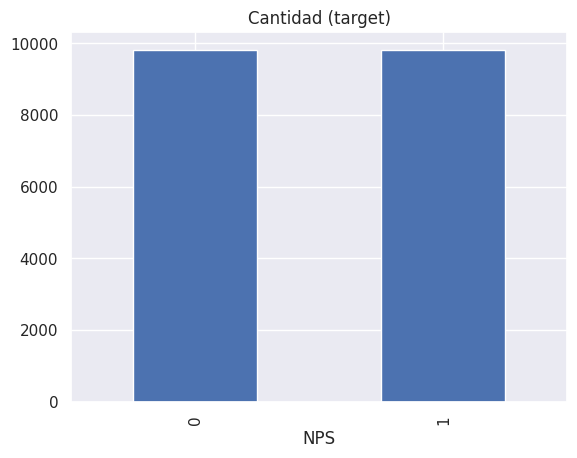

In [ ]:
df_class4_1_over = df_class4_1.sample(count_class4_0, replace=True)
df_train4_over = pd.concat([df_class4_0, df_class4_1_over], axis=0)

print('Random over-sampling:')
print(df_train4_over.NPS.value_counts())

df_train4_over.NPS.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Seleccionar las 10 mejores variables
mejores_variables_50 = ['Sentimiento', '1componente', 'Score', '5componente',
       'Clave de carrera', '3componente', '10componente', '6componente',
       '4componente', 'Tema_12', '7componente', '16componente',
       'Frecuencia_Stop_Words', '14componente', '2componente', '8componente',
       '15componente', '11componente', '17componente', '12componente',
       '18componente', '13componente', 'CANT_CURSOS_MATRICU_SIN_INGLES',
       '19componente', 'Ciclo', '9componente', 'mayusculas/letras',
       'Complejidad_Lenguaje', 'letras/palabras', 'Tema_19', 'Tema_8',
       '0componente', 'Tema_6', 'n_letras', 'Nombre Campus', 'n_palabras',
       'Tema_13', 'Errores_Ortografia', 'Num_Palabras_Unicas', 'Tema_14',
       'Tema_17', 'Tema_15', 'Tema_7', 'Tema_11', 'n_mayusculas', 'Tema_16',
       'Tema_0', 'Tema_4', 'Tema_18', 'Tema_3']

Xtr4over = df_train4_over[mejores_variables_50]
ytr4over = df_train4_over['NPS']

Xte4 = test[mejores_variables_50]

####Red Neuronal

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one4_hot1 = to_categorical(ytr4over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train4, X_test4, y_train4, y_test4 = train_test_split(Xtr4over, y_one4_hot1, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train4_scaled = scaler.fit_transform(X_train4)
X_test4_scaled = scaler.transform(X_test4)

X_test4_final = scaler.transform(Xte4)

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(128, input_dim=X_train4.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train4_scaled, y_train4, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_test4_pred_proba_final = model.predict(X_test4_final)

y_test4_pred_proba = model.predict(X_test4_scaled)
y_test4_pred = np.argmax(y_test4_pred_proba, axis=1)
y_test4_true = np.argmax(y_test4, axis=1)

accuracy = accuracy_score(y_test4_true, y_test4_pred)
log_loss_value = log_loss(y_test4, y_test4_pred_proba)

print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test4_true, y_test4_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Epoch 1/50
393/393 [==============================] - 2s 3ms/step - loss: 0.5078 - accuracy: 0.7601 - val_loss: 0.3778 - val_accuracy: 0.8426
Epoch 2/50
393/393 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8337 - val_loss: 0.3600 - val_accuracy: 0.8492
Epoch 3/50
393/393 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.8402 - val_loss: 0.3680 - val_accuracy: 0.8489
Epoch 4/50
393/393 [==============================] - 1s 4ms/step - loss: 0.3708 - accuracy: 0.8503 - val_loss: 0.3655 - val_accuracy: 0.8597
Epoch 5/50
393/393 [==============================] - 3s 7ms/step - loss: 0.3640 - accuracy: 0.8552 - val_loss: 0.3598 - val_accuracy: 0.8537
Epoch 6/50
393/393 [==============================] - 2s 4ms/step - loss: 0.3631 - accuracy: 0.8529 - val_loss: 0.3481 - val_accuracy: 0.8556
Epoch 7/50
393/393 [==============================] - 2s 4ms/step - loss: 0.3538 - accuracy: 0.8596 - val_loss: 0.3451 - val_accuracy: 0.8566
Epoch 

In [ ]:
pd1 = pd.DataFrame(y_test4_pred_proba_final, columns=[0, 4])
df_concat4 = pd.concat([df_concat3, pd1[4]], axis=1)
df_concat4.head()

,COD_ENCUESTADO,1,2,3,4
0,27398,5.905622e-02,2.258506e-02,0.283772,0.368394
1,25686,2.169263e-11,1.008412e-02,0.031921,0.956991
2,449,4.979821e-27,1.039700e-09,0.078734,0.994731
3,26681,5.977140e-35,3.690251e-07,0.059496,0.974941
4,3341,1.078146e-03,7.688845e-01,0.409114,0.148025


In [ ]:
df_renamed = df_concat4.rename(columns={1: 'NPS1', 2: 'NPS2', 3: 'NPS3', 4: 'NPS4'})

In [ ]:
df_renamed.head()

,COD_ENCUESTADO,NPS1,NPS2,NPS3,NPS4
0,27398,5.905622e-02,2.258506e-02,0.283772,0.368394
1,25686,2.169263e-11,1.008412e-02,0.031921,0.956991
2,449,4.979821e-27,1.039700e-09,0.078734,0.994731
3,26681,5.977140e-35,3.690251e-07,0.059496,0.974941
4,3341,1.078146e-03,7.688845e-01,0.409114,0.148025


In [ ]:
df_renamed.to_csv('submission.csv',index=False)

####ELM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import hpelm

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr4over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr4over, y_one1_hot1, test_size=0.2, random_state=42)

# Definiendo Funcion
class ELMClassifier:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.input_weights = np.random.randn(input_size, hidden_size)
        self.hidden_bias = np.random.randn(hidden_size)
        self.output_weights = None

    def fit(self, X, y):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        self.output_weights = np.linalg.pinv(H).dot(y)

    def predict(self, X):
        H = np.dot(X, self.input_weights)
        H += self.hidden_bias
        H = np.maximum(H, 0)  # ReLU activation function
        return np.dot(H, self.output_weights)

# Crear y entrenar el clasificador ELM

input_size = X_train1.shape[1]
hidden_size = 1000  # Número de neuronas en la capa oculta
output_size = len(np.unique(y_train1))  # Número de clases
elm = ELMClassifier(input_size, hidden_size, output_size)
elm.fit(X_train1, y_train1)


# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = elm.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Accuracy en el conjunto de prueba: 0.8199918732222674
Log Loss en el conjunto de prueba: 0.5671455677924266
              precision    recall  f1-score   support

     Clase 0       0.82      0.83      0.82      2469
     Clase 1       0.82      0.81      0.82      2453

    accuracy                           0.82      4922
   macro avg       0.82      0.82      0.82      4922
weighted avg       0.82      0.82      0.82      4922



####RBF

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Supongamos que X_train y y_train ya están definidos y preprocesados.

# Convertir las etiquetas a formato one-hot
y_one1_hot1 = to_categorical(ytr4over, num_classes=2)  # Restar 1 para que las clases empiecen desde 0

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xtr4over, y_one1_hot1, test_size=0.2, random_state=42)

# Definir el clasificador RBF
class RBFClassifier:
    def __init__(self, num_centers, sigma=1.0):
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def fit(self, X, y):
        # Seleccionar centros aleatorios
        idx = np.random.choice(X.shape[0], self.num_centers, replace=False)
        self.centers = X[idx]
        # Calcular activaciones RBF
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        # Resolver sistema lineal para obtener los pesos de salida
        self.weights = np.linalg.lstsq(RBF, y, rcond=None)[0]

    def predict(self, X):
        RBF = np.exp(-cdist(X, self.centers) ** 2 / (2 * self.sigma ** 2))
        return np.dot(RBF, self.weights)

# Asegurarse de que X_train1 y X_test1 son numpy arrays
if isinstance(X_train1, pd.DataFrame):
    X_train1 = X_train1.values
if isinstance(X_test1, pd.DataFrame):
    X_test1 = X_test1.values

# Verificar las formas de los datos
print("Forma de X_train1:", X_train1.shape)
print("Forma de y_train1:", y_train1.shape)
print("Forma de X_test1:", X_test1.shape)
print("Forma de y_test1:", y_test1.shape)

# Definir el número de centros (neuronas)
num_centers = 1000

# Crear y entrenar el clasificador RBF
rbf = RBFClassifier(num_centers)
rbf.fit(X_train1, y_train1)

# Evaluar el modelo en el conjunto de prueba
y_test_pred_proba = rbf.predict(X_test1)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)
y_test_true = np.argmax(y_test1, axis=1)

accuracy = accuracy_score(y_test_true, y_test_pred)
log_loss_value = log_loss(y_test1, y_test_pred_proba)


print("Accuracy en el conjunto de prueba:", accuracy)
print("Log Loss en el conjunto de prueba:", log_loss_value)
print(classification_report(y_test_true, y_test_pred, labels=[0, 1], target_names=['Clase 0', 'Clase 1']))

Forma de X_train1: (19686, 50)
Forma de y_train1: (19686, 2)
Forma de X_test1: (4922, 50)
Forma de y_test1: (4922, 2)
Accuracy en el conjunto de prueba: 0.5767980495733441
Log Loss en el conjunto de prueba: 1.3526770356746933
              precision    recall  f1-score   support

     Clase 0       0.59      0.50      0.54      2469
     Clase 1       0.57      0.65      0.61      2453

    accuracy                           0.58      4922
   macro avg       0.58      0.58      0.57      4922
weighted avg       0.58      0.58      0.57      4922

